In [ ]:
# psuedo code
steps = ['before cleaning',
         'after cleaning, but before 1st difference',
         'after cleaning and after differenceing']
for f in feature:
  for s in steps:
    print_the_step_in_english.
    print_statistics() # mean, std, kurt, skew, meedian, max, min, range, q1, q3, iqr
    jointplot()
    jointplot_periodic() # hours of the week


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')
from google.colab import drive
drive.mount('/content/drive')
# pd.set_option('max_columns', 75)
from scipy.fft import fft, fftfreq


Mounted at /content/drive


In [ ]:
X=pd.read_csv('/content/drive/MyDrive/MyBoxDataSet/MyBox.csv')
X.shape

(38041, 58)

In [ ]:
X.columns
# X.drop(['Time (UTC)'],axis=1)
# X.drop(index=78, axis=0)
# X.drop(4398, axis=0)
X['Time (UTC)']=pd.to_datetime(X['Time (UTC)'], errors='coerce')
# X.columns

In [ ]:
X.dtypes

In [ ]:
X.describe()
## Basic describe features
desc = X.describe()

# Transpose the result
desc = desc.transpose()

# Save to CSV
desc.to_csv('descriptive_statistics.csv')
desc.shape

Q1 = X.quantile(0.25)
Q2 = X.quantile(0.5)
Q3 = X.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Combine results into a single DataFrame
quartiles = pd.DataFrame({
    'Q1': Q1,
    'Median (Q2)': Q2,
    'Q3': Q3,
    'IQR': IQR
})


# Save to CSV
quartiles.to_csv('quartiles.csv')
quartiles.shape


X_temp=X.drop(columns=['Time (UTC)'])

# Calculate Skewness

skewness = X_temp.skew()

# Calculate Kurtosis
kurtosis = X_temp.kurt()

# Calculate Range
range_values = X_temp.max() - X_temp.min()

# Combine results into a single DataFrame
analysis = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Range': range_values
})

# Display the results
# print(analysis)

# Save to CSV
analysis.to_csv('skew_kurt_range_analysis.csv')
# print (X)

In [ ]:
#No. of missing values
Y=X.isna().sum()
Y.to_csv('NA.csv')
percent_nan = X_temp.isna().mean() * 100
percent_zeros = (X_temp == 0).mean() * 100
Z=pd.DataFrame({
    'Percenant_NaN' :percent_nan,
    'Percenant_Zeroes' : percent_zeros
  });

Z.to_csv('Health.csv')

In [ ]:
#Checkong for duplicated rows
X.duplicated(subset=['Time (UTC)']).sum()
X = X.drop_duplicates()
X = X.dropna(subset=['Time (UTC)'])
# X.loc[X.duplicated(subset=['Time (UTC)'])]

In [ ]:
X.reset_index(drop=True)

Time (UTC)  API - OutsideWeatherTemp  \
0     2023-08-31 11:12:00+00:00                       NaN   
1     2023-08-31 11:20:00+00:00                      19.8   
2     2023-08-31 11:30:00+00:00                      19.8   
3     2023-08-31 11:40:00+00:00                      19.8   
4     2023-08-31 11:50:00+00:00                      19.8   
...                         ...                       ...   
37876 2024-05-20 11:30:00+00:00                      22.6   
37877 2024-05-20 11:40:00+00:00                      22.6   
37878 2024-05-20 11:50:00+00:00                      21.5   
37879 2024-05-20 12:00:00+00:00                      21.5   
37880 2024-05-20 12:10:00+00:00                      21.5   

       API - OutsideWeatherWind  API -EnergyPrice  Energy Meter - CALC_0  \
0                           NaN           96.1890                    NaN   
1                           3.5           96.1890           501781.86660   
2                           3.5           96.1890           502385.77250   
3                           3.5           96.1890           502385.77250   
4                           3.5           96.1890           502392.72340   
...                         ...               ...                    ...   
37876                       2.9            0.2877            14578.65277   
37877                       2.9            2.8770            14578.94458   
37878                       2.9            0.2877            14578.94626   
37879                       2.9            0.0120            14578.94626   
37880                       2.9            0.0120            14578.94626   

       Energy Meter - CALC_1.9  Energy Meter - CALC_2.9  \
0                          NaN                      NaN   
1                420921.117100              6759.143624   
2                421496.387100              6759.143624   
3                421496.387100              6759.143624   
4                421497.076400              6764.582428   
...                        ...                      ...   
37876              8543.999128              6034.653642   
37877              8544.289607              6034.656652   
37878              8544.289607              6034.656652   
37879              8544.289607              6034.656652   
37880              8544.289607              6034.656652   

       Energy Meter - EM_1.1  Energy Meter - EM_1.2  Energy Meter - EM_1.3  \
0                        NaN                    NaN                    NaN   
1               23861.592210           23611.223540             522.458383   
2               23861.592210           23611.223540             522.458383   
3               23861.592210           23611.223540             522.458383   
4               23892.021720           23714.439680             522.458383   
...                      ...                    ...                    ...   
37876             102.173887            2602.455847             607.678650   
37877             102.173887            2602.455847             607.678650   
37878             102.173887            2602.455847             607.678650   
37879             102.173887            2602.455847             607.678650   
37880             102.173887            2602.455847             607.678650   

       ...  Power - EM_2.3  Power - EM_2.3-Slow  Power - EM_2.4  \
0      ...             NaN                  NaN             NaN   
1      ...             NaN                  NaN             NaN   
2      ...             NaN                  NaN             NaN   
3      ...             NaN                  NaN             NaN   
4      ...             NaN                  NaN             NaN   
...    ...             ...                  ...             ...   
37876  ...        0.000971              0.00099             0.0   
37877  ...        0.000971              0.00099             0.0   
37878  ...        0.000971              0.00099             0.0   
37879  ...        0.000971              0.00099            

In [ ]:
import pandas as pd

# Assuming 'X' is your original DataFrame

# Remove 'Time (UTC)' column for cleaning
X_temp = X.drop(columns=['Time (UTC)'])

# Function to clean column by removing NaN and zero values
def clean_columns(col):
    cleaned = col.dropna()
    cleaned = cleaned[cleaned != 0]
    return cleaned

# Create a copy of the original DataFrame for cleaning
X_clean = X.copy()

# Initialize dictionaries for statistics
mean = {}
q1_val = {}
q3_val = {}
iqr_val = {}
clean = {}
lower_threshold = {}
upper_threshold = {}

# Clean each column and calculate initial statistics
for col in X_clean.columns:
    if col == 'Time (UTC)':
        continue
    clean[col] = clean_columns(X_clean[col])
    mean[col] = clean[col].mean()
    q1_val[col] = clean[col].quantile(0.25)
    q3_val[col] = clean[col].quantile(0.75)
    iqr_val[col] = q3_val[col] - q1_val[col]
    lower_threshold[col] = q1_val[col] - 1.5 * iqr_val[col]
    upper_threshold[col] = q3_val[col] + 1.5 * iqr_val[col]

# Function to clean column data based on IQR thresholds
def clean_column(col):
    cleaned_col = clean[col]
    cleaned_col = cleaned_col[(cleaned_col >= lower_threshold[col]) & (cleaned_col <= upper_threshold[col])]
    return cleaned_col

# Initialize dictionaries for cleaned data statistics
cleaned_data = {}
size = {}
std = {}
skewness = {}
kurtosis = {}
min_val = {}
median_val = {}
max_val = {}
range_val = {}

# Calculate the required statistics for each column using the cleaned data
for col in X_clean.columns:
    if col == 'Time (UTC)':
        continue
    cleaned_data[col] = clean_column(col)
    size[col] = len(cleaned_data[col])
    mean[col] = cleaned_data[col].mean()
    std[col] = cleaned_data[col].std()
    skewness[col] = cleaned_data[col].skew()
    kurtosis[col] = cleaned_data[col].kurt()
    min_val[col] = cleaned_data[col].min()
    q1_val[col] = cleaned_data[col].quantile(0.25)
    median_val[col] = cleaned_data[col].median()
    q3_val[col] = cleaned_data[col].quantile(0.75)
    max_val[col] = cleaned_data[col].max()
    iqr_val[col] = q3_val[col] - q1_val[col]
    range_val[col] = max_val[col] - min_val[col]

# Combine results into a single DataFrame
analysis = pd.DataFrame({
    'Size': size,
    'Mean': mean,
    'Std': std,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Min': min_val,
    'Q1': q1_val,
    'Median': median_val,
    'Q3': q3_val,
    'Max': max_val,
    'IQR': iqr_val,
    'Range': range_val
})

# Display the results
print("Cleaned Data Analysis:")
print(analysis)

# Save to CSV
analysis.to_csv('cleaned_data_analysis_final.csv')


Cleaned Data Analysis:
                                       Size         Mean           Std  \
API - OutsideWeatherTemp              36904     6.209340  5.178811e+00   
API - OutsideWeatherWind              37077     4.633220  2.783617e+00   
API -EnergyPrice                      37520    47.273881  4.013375e+01   
Energy Meter - CALC_0                 37652  6641.586672  4.686393e+03   
Energy Meter - CALC_1.9               37715  3914.396510  2.648037e+03   
Energy Meter - CALC_2.9               34260  3042.788129  1.958985e+03   
Energy Meter - EM_1.1                 37716    53.946978  2.537168e+01   
Energy Meter - EM_1.2                 37717  1137.359185  1.072659e+03   
Energy Meter - EM_1.3                 37855   316.674716  2.010521e+02   
Energy Meter - EM_1.4                 34810     6.119809  3.985085e+00   
Energy Meter - EM_1.5                 35845    18.147062  1.334546e+01   
Energy Meter - EM_1.6                 33210     0.003086  5.019506e-03   
Energy Meter - 

In [ ]:
# analysis.shape
X_temp.shape
X_temp

API - OutsideWeatherTemp  API - OutsideWeatherWind  API -EnergyPrice  \
0                           NaN                       NaN           96.1890   
1                          19.8                       3.5           96.1890   
2                          19.8                       3.5           96.1890   
3                          19.8                       3.5           96.1890   
4                          19.8                       3.5           96.1890   
...                         ...                       ...               ...   
38036                      22.6                       2.9            0.2877   
38037                      22.6                       2.9            2.8770   
38038                      21.5                       2.9            0.2877   
38039                      21.5                       2.9            0.0120   
38040                      21.5                       2.9            0.0120   

       Energy Meter - CALC_0  Energy Meter - CALC_1.9  \
0                        NaN                      NaN   
1               501781.86660            420921.117100   
2               502385.77250            421496.387100   
3               502385.77250            421496.387100   
4               502392.72340            421497.076400   
...                      ...                      ...   
38036            14578.65277              8543.999128   
38037            14578.94458              8544.289607   
38038            14578.94626              8544.289607   
38039            14578.94626              8544.289607   
38040            14578.94626              8544.289607   

       Energy Meter - CALC_2.9  Energy Meter - EM_1.1  Energy Meter - EM_1.2  \
0                          NaN                    NaN                    NaN   
1                  6759.143624           23861.592210           23611.223540   
2                  6759.143624           23861.592210           23611.223540   
3                  6759.143624           23861.592210           23611.223540   
4                  6764.582428           23892.021720           23714.439680   
...                        ...                    ...                    ...   
38036              6034.653642             102.173887            2602.455847   
38037              6034.656652             102.173887            2602.455847   
38038              6034.656652             102.173887            2602.455847   
38039              6034.656652             102.173887            2602.455847   
38040              6034.656652             102.173887            2602.455847   

       Energy Meter - EM_1.3  Energy Meter - EM_1.4  ...  Power - EM_2.3  \
0                        NaN                    NaN  ...             NaN   
1                 522.458383            1180.639030  ...             NaN   
2                 522.458383            1180.639030  ...             NaN   
3                 522.458383            1180.639030  ...             NaN   
4                 522.458383            1181.328350  ...             NaN   
...                      ...                    ...  ...             ...   
38036             607.678650              18.122954  ...        0.000971   
38037             607.678650              18.122954  ...        0.000971   
38038             607.678650              18.122954  ...        0.000971   
38039             607.678650              18.122954  ...        0.000971   
38040             607.678650              18.122954  ...        0.000971   

       Power - EM_2.3-Slow  Power - EM_2.4  Power - EM_2.4-Slow  \
0                      NaN             NaN                  NaN   
1                      NaN             NaN                  NaN   
2                      NaN             NaN                  NaN   
3                      NaN             NaN                  NaN   
4                      NaN             NaN                  NaN   
...                    ...             ...                  ...   
38036              0.00099    

<Axes: ylabel='Frequency'>

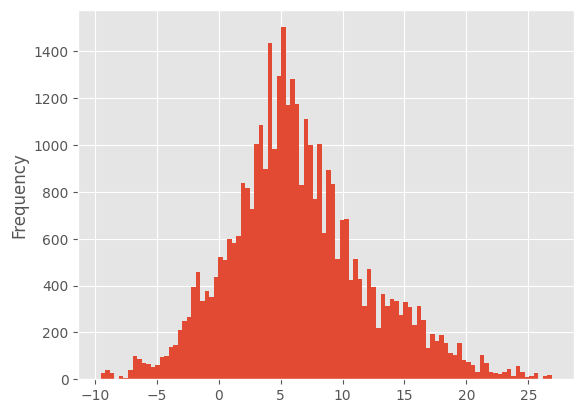

In [ ]:
# @title Feature Understanding
# Univriate analysis ==>plotting feature distributions


# Frequency dist
X['API - OutsideWeatherTemp'].plot(kind='hist', bins=100)
# X['API - OutsideWeatherTemp'].mean()

<Axes: ylabel='Density'>

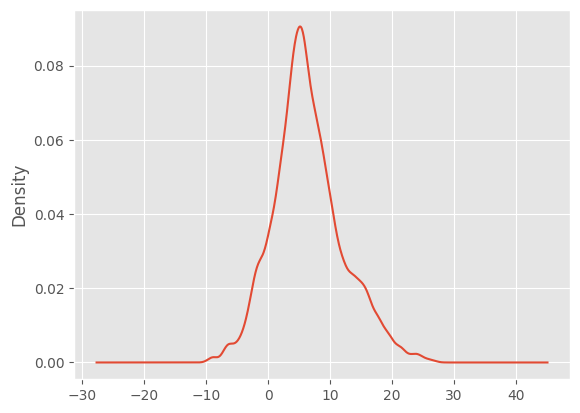

In [ ]:
X['API - OutsideWeatherTemp'].plot(kind='kde')

In [ ]:
# sns.boxplot(x='Time (UTC)', y='API - OutsideWeatherTemp', data=X)

In [ ]:
# Feature Relationships
#Scatter Plots
# X.plot(kind='scatter', x='API - OutsideWeatherTemp', y='API - OutsideWeatherWind')

<Axes: xlabel='API - OutsideWeatherTemp', ylabel='API - OutsideWeatherWind'>

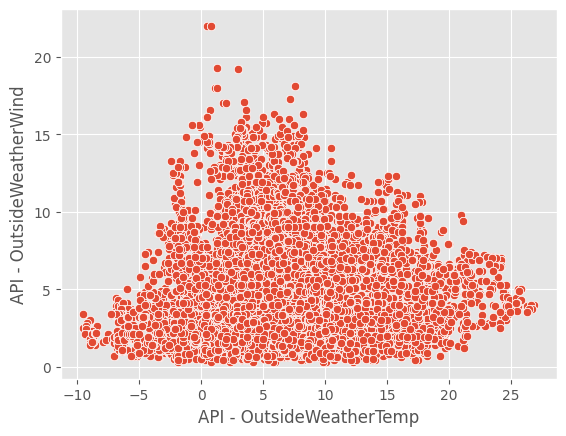

In [ ]:
sns.scatterplot(x='API - OutsideWeatherTemp', y='API - OutsideWeatherWind', data=X)

In [ ]:
Corr=X[X.columns[1:4]].dropna().corr()
X.columns[1:4]

Index(['API - OutsideWeatherTemp', 'API - OutsideWeatherWind',
       'API -EnergyPrice'],
      dtype='object')

<Axes: >

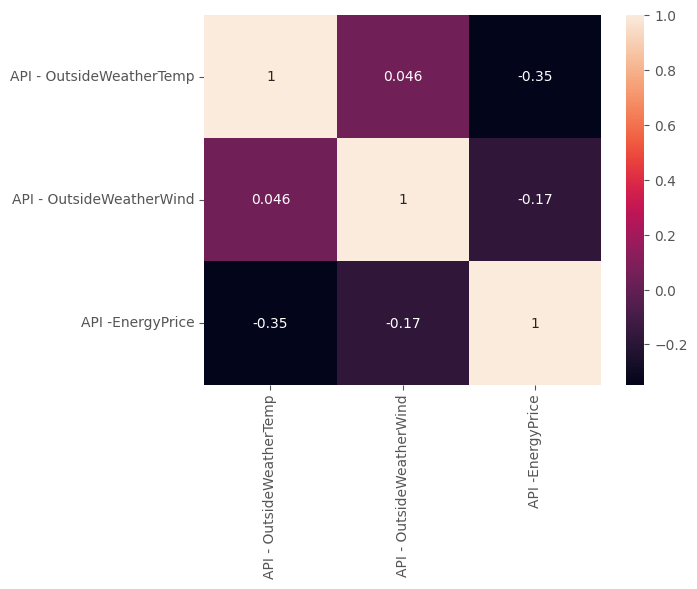

In [ ]:
sns.heatmap(Corr, annot=True)

<Axes: >

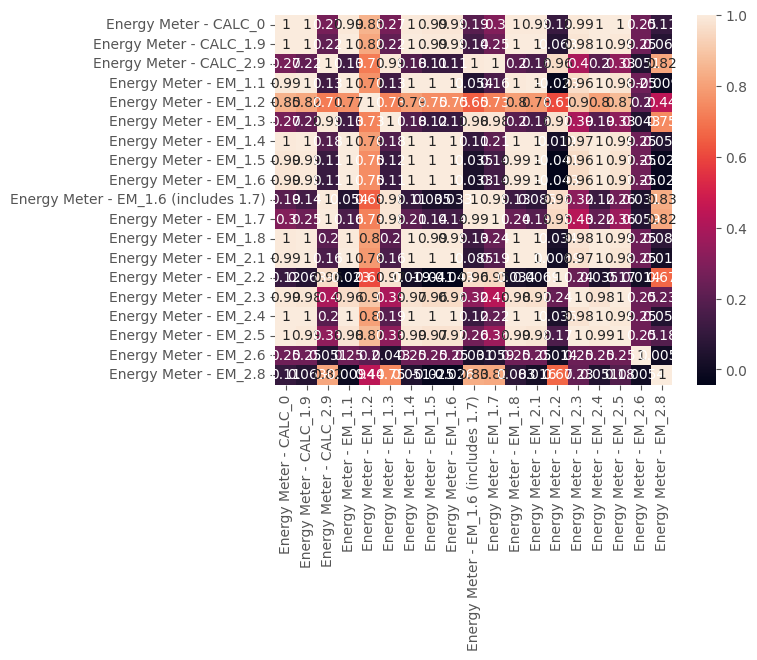

In [ ]:
Corr=X[X.columns[4:23]].dropna().corr()
# X.columns[1:4]
sns.heatmap(Corr, annot=True)

<Axes: xlabel='Time (UTC)', ylabel='API - OutsideWeatherTemp'>

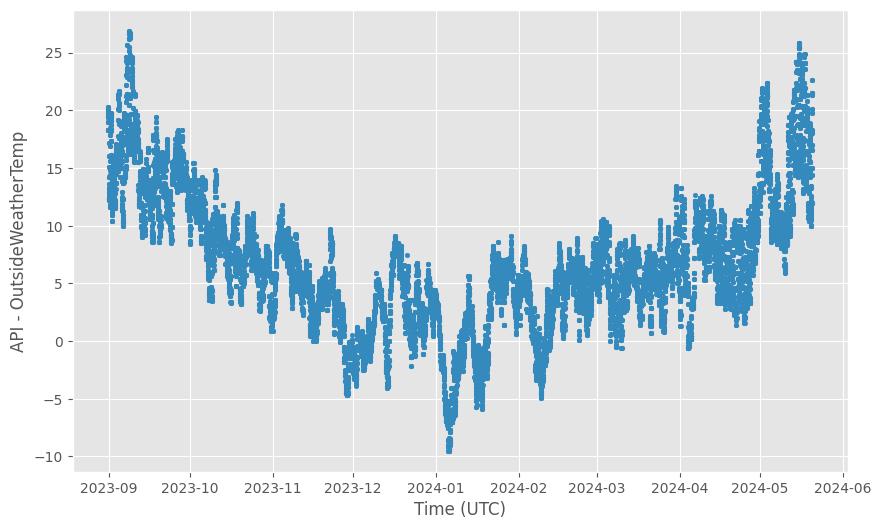

In [ ]:
X.plot(kind ='scatter', x='Time (UTC)', y='API - OutsideWeatherTemp', s=10, figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

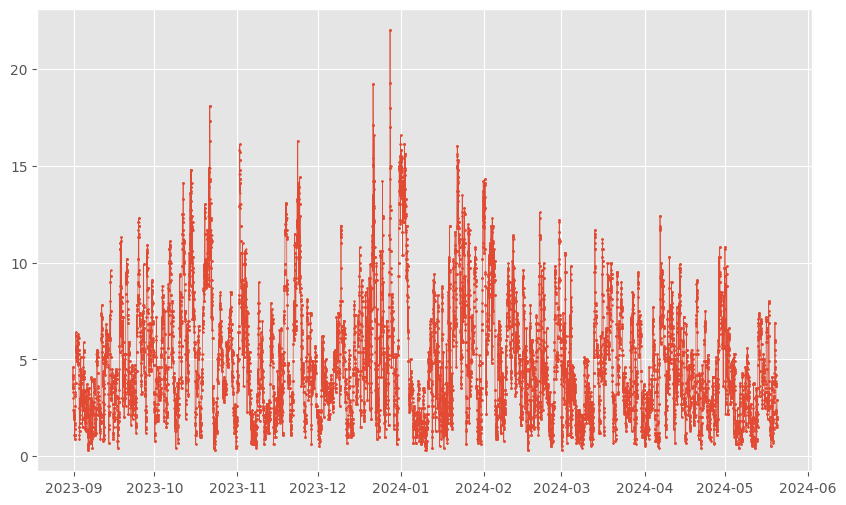

In [ ]:
plt.figure(figsize=(10, 6))
# plt.plot(X['Time (UTC)'], X['API - OutsideWeatherTemp', 'API - OutsideWeatherWind','API -EnergyPrice'], marker='o', linestyle='-', markersize=0.55, linewidth=0.5)
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(X['Time (UTC)'], X['API - OutsideWeatherTemp'], marker='o', linestyle='-', markersize=0.55, linewidth=0.5, label='Outside Weather Temp')
ax.plot(X['Time (UTC)'], X['API - OutsideWeatherWind'], marker='o', linestyle='-', markersize=0.55, linewidth=0.5, label='Outside Weather Wind')
# ax.plot(X['Time (UTC)'], X['API -EnergyPrice'], marker='o', linestyle='-', markersize=0.55, linewidth=0.5, label='Energy Price')


In [ ]:
X.columns

Index(['Time (UTC)', 'API - OutsideWeatherTemp', 'API - OutsideWeatherWind',
       'API -EnergyPrice', 'Energy Meter - CALC_0', 'Energy Meter - CALC_1.9',
       'Energy Meter - CALC_2.9', 'Energy Meter - EM_1.1',
       'Energy Meter - EM_1.2', 'Energy Meter - EM_1.3',
       'Energy Meter - EM_1.4', 'Energy Meter - EM_1.5',
       'Energy Meter - EM_1.6', 'Energy Meter - EM_1.6 (includes 1.7)',
       'Energy Meter - EM_1.7', 'Energy Meter - EM_1.8',
       'Energy Meter - EM_2.1', 'Energy Meter - EM_2.2',
       'Energy Meter - EM_2.3', 'Energy Meter - EM_2.4',
       'Energy Meter - EM_2.5', 'Energy Meter - EM_2.6',
       'Energy Meter - EM_2.8', 'H0101-Temperature', 'H0102-Temperature',
       'Power - CALC_0', 'Power - CALC_1.9', 'Power - EM_1.1',
       'Power - EM_1.1-Slow', 'Power - EM_1.2', 'Power - EM_1.2-Slow',
       'Power - EM_1.3', 'Power - EM_1.3-Slow', 'Power - EM_1.4',
       'Power - EM_1.4-Slow', 'Power - EM_1.5', 'Power - EM_1.5-Slow',
       'Power - EM_1.6', '

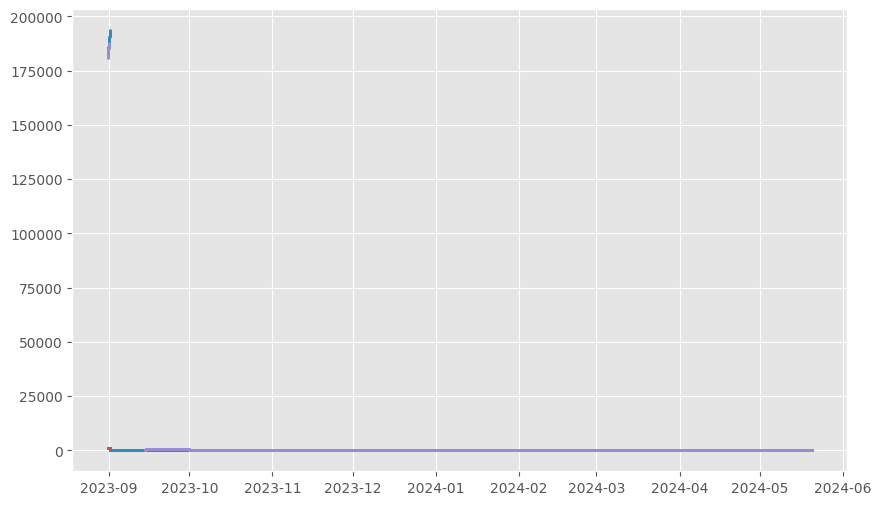

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(X['Time (UTC)'], X['Energy Meter - EM_1.4'], marker='o', linestyle='-', markersize=0.55, linewidth=0.5, label='EM-1.4')
ax.plot(X['Time (UTC)'], X['Energy Meter - EM_1.5'], marker='o', linestyle='-', markersize=0.55, linewidth=0.5, label='EM-1.5')
ax.plot(X['Time (UTC)'], X['Energy Meter - EM_1.6'], marker='o', linestyle='-', markersize=0.55, linewidth=0.5, label='EM-1.6')


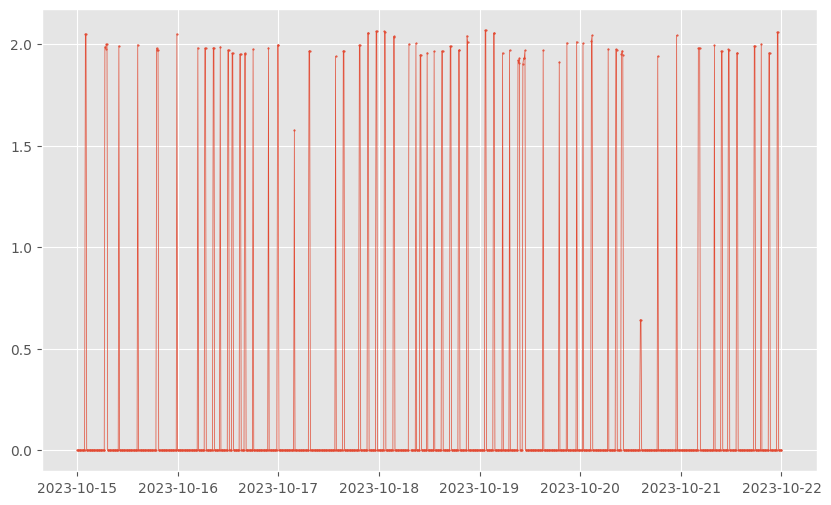

In [ ]:
Y=X[X['Time (UTC)']>='2023-10-15 00:00:00']
Y=Y[Y['Time (UTC)']<='2023-10-22 00:00:00']

fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Y['Time (UTC)'], Y['Energy Meter - EM_1.2'], marker='o', linestyle='-', markersize=0.55, linewidth=0.5, label='EM-1.4')
ax.plot(Y['Time (UTC)'], Y['Power - EM_2.3'], marker='o', linestyle='-', markersize=0.55, linewidth=0.5, label='EM-1.5')
# ax.plot(Y['Time (UTC)'], Y['Energy Meter - EM_1.6'], marker='o', linestyle='-', markersize=0.55, linewidth=0.5, label='EM-1.6')



In [ ]:
X.columns

Index(['Time (UTC)', 'API - OutsideWeatherTemp', 'API - OutsideWeatherWind',
       'API -EnergyPrice', 'Energy Meter - CALC_0', 'Energy Meter - CALC_1.9',
       'Energy Meter - CALC_2.9', 'Energy Meter - EM_1.1',
       'Energy Meter - EM_1.2', 'Energy Meter - EM_1.3',
       'Energy Meter - EM_1.4', 'Energy Meter - EM_1.5',
       'Energy Meter - EM_1.6', 'Energy Meter - EM_1.6 (includes 1.7)',
       'Energy Meter - EM_1.7', 'Energy Meter - EM_1.8',
       'Energy Meter - EM_2.1', 'Energy Meter - EM_2.2',
       'Energy Meter - EM_2.3', 'Energy Meter - EM_2.4',
       'Energy Meter - EM_2.5', 'Energy Meter - EM_2.6',
       'Energy Meter - EM_2.8', 'H0101-Temperature', 'H0102-Temperature',
       'Power - CALC_0', 'Power - CALC_1.9', 'Power - EM_1.1',
       'Power - EM_1.1-Slow', 'Power - EM_1.2', 'Power - EM_1.2-Slow',
       'Power - EM_1.3', 'Power - EM_1.3-Slow', 'Power - EM_1.4',
       'Power - EM_1.4-Slow', 'Power - EM_1.5', 'Power - EM_1.5-Slow',
       'Power - EM_1.6', '

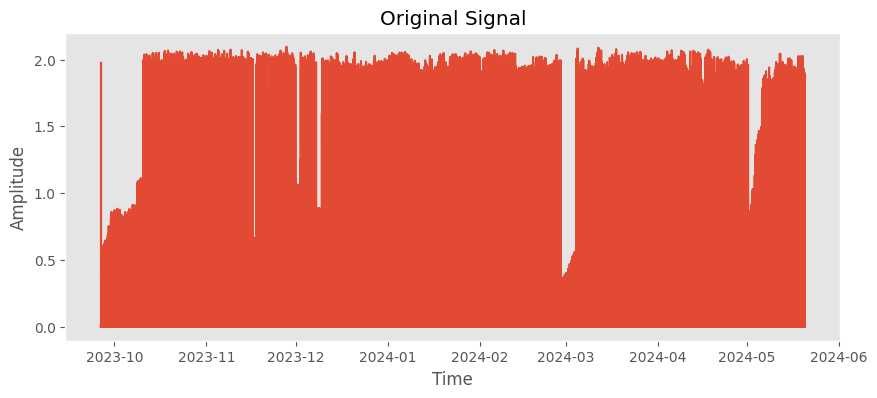

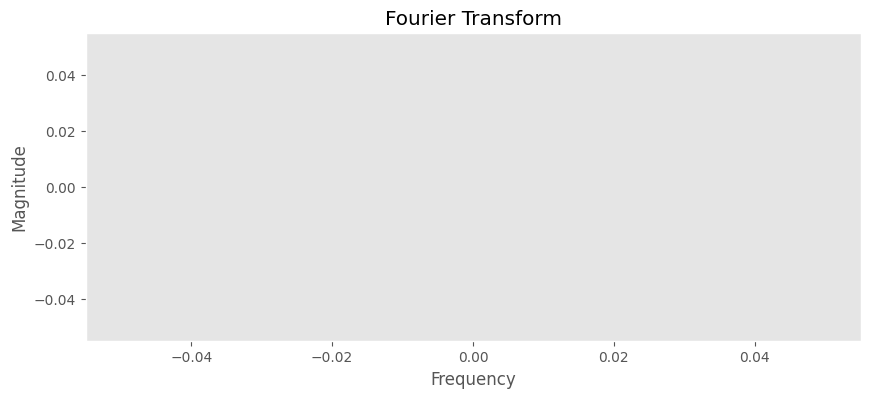

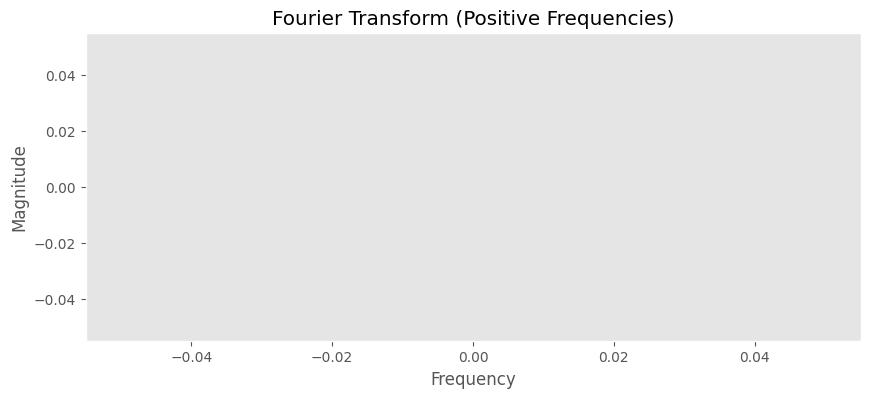

In [ ]:
###Taking the fourier transform to check for periodicity
time = X['Time (UTC)']
values = X['Power - EM_2.3']

values = values.to_numpy()
time_diffs = (time - time.shift())  # Calculate time differences and drop NaN
time_diffs_in_seconds = time_diffs.dt.total_seconds().mean()  # Convert to seconds and take the mean

# Compute the sample rate
sample_rate = 1 / time_diffs_in_seconds

# Compute the Fourier transform
yf = fft(values)

# Compute the frequencies corresponding to the Fourier transform
xf = fftfreq(len(time), 1 / sample_rate)

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(time, values)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Plot the Fourier transform (magnitude)
plt.figure(figsize=(10, 4))
plt.plot(xf, np.abs(yf))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Only plot the positive frequencies
positive_frequencies = xf > 0
plt.figure(figsize=(10, 4))
plt.plot(xf[positive_frequencies], np.abs(yf[positive_frequencies]))
plt.title('Fourier Transform (Positive Frequencies)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

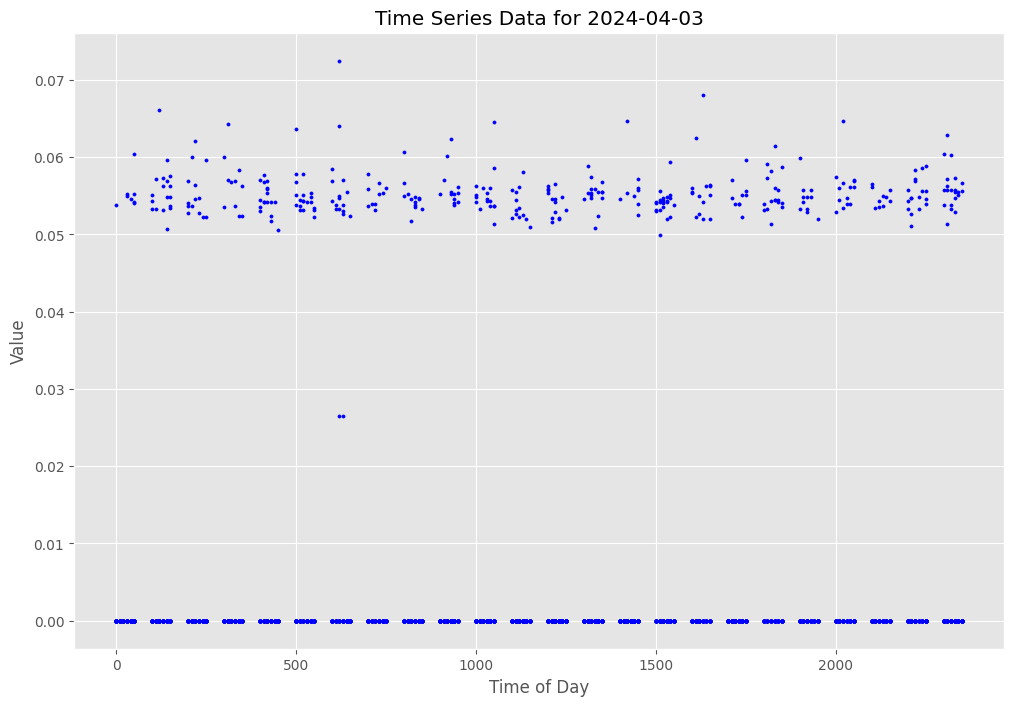

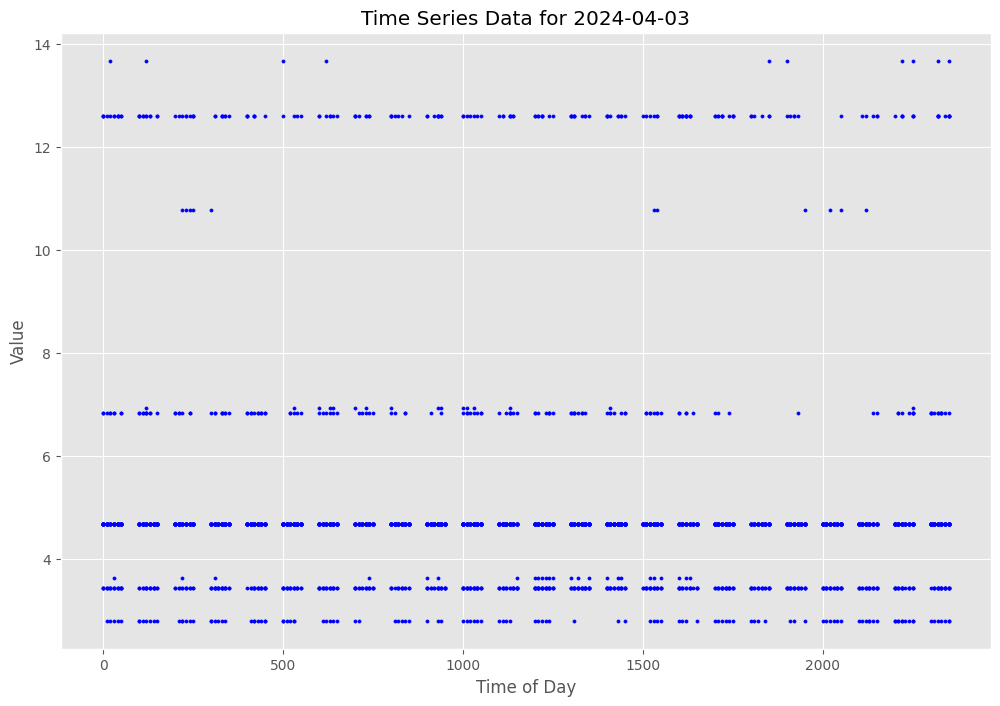

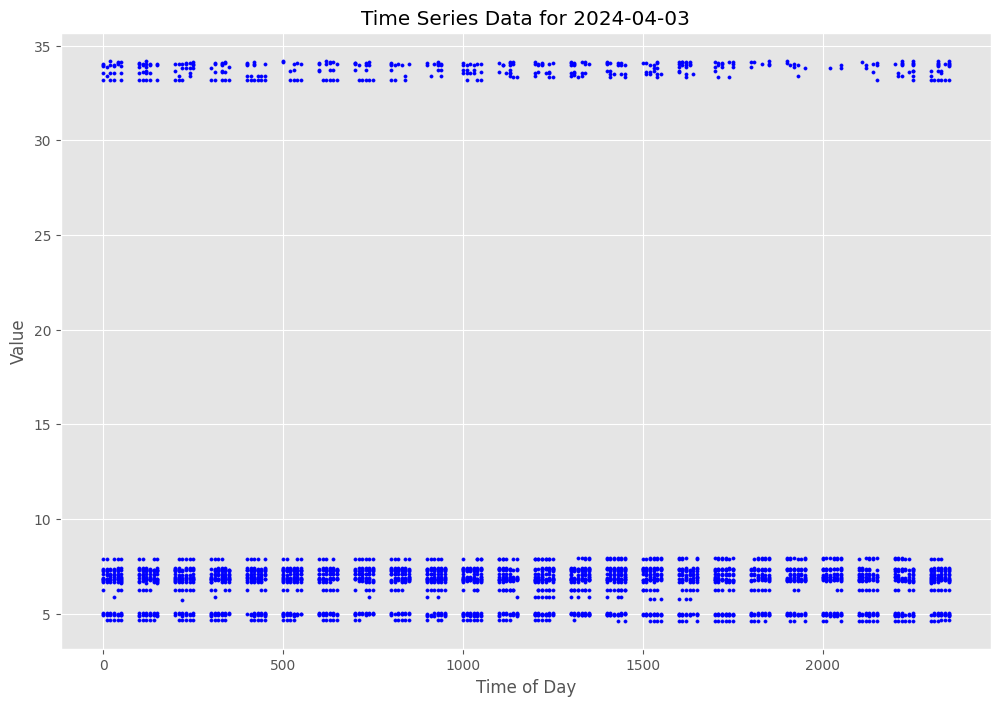

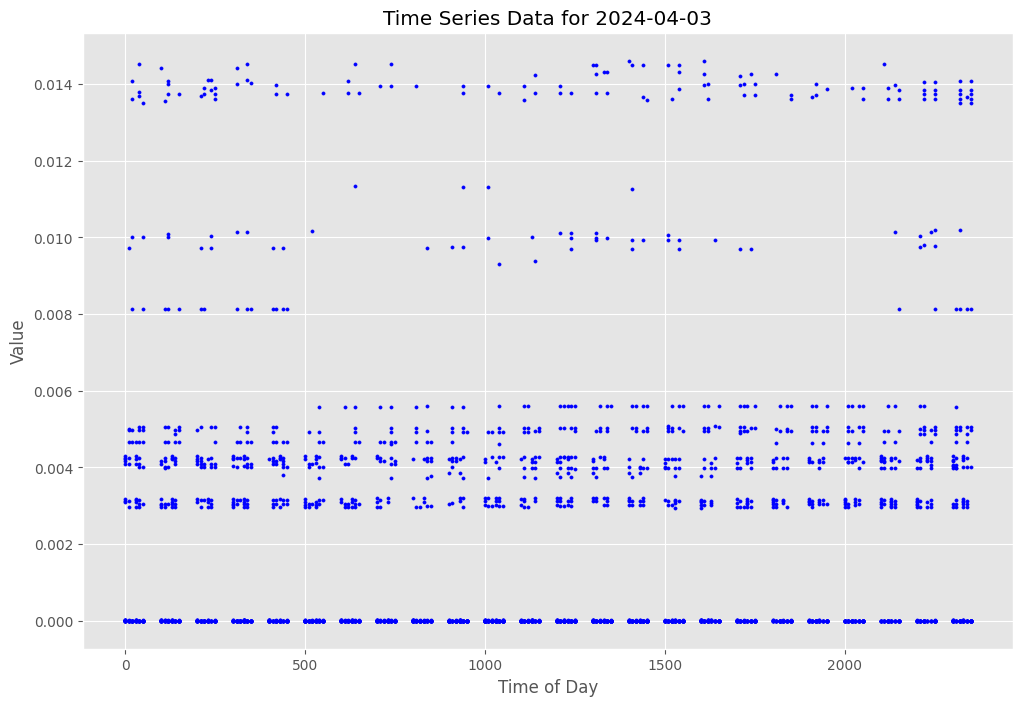

In [ ]:
# # X['Time (UTC)'] = pd.to_datetime(X['Time (UTC)'])
# # Extract the time of day from the 'Time' column
# X_temp=X_clean.copy()
# X_temp['Date'] = X_temp['Time (UTC)'].dt.date

# # Extract the time of day from the 'Time (UTC)' column
# X_temp['TimeOfDay'] = X_temp['Time (UTC)'].dt.time

# # X_temp['Time (UTC)'] = X_temp['Time (UTC)'].dt.time
# unique_dates = X_temp['Date'].unique()

# # Extract the date from the 'Time' column
# # X_temp['Date'] = X_temp['Time (UTC)'].dt.date

# # exclude_columns=['TimeOfDay','Date', 'Time (UTC)']
# # features =[col for col in X_temp.columns if col not in exclude_columns]
# # features
# features=[
#  'Power - EM_1.1-Slow',

#  'Energy Meter - EM_1.4',
#  'Energy Meter - EM_1.5',
#  'Energy Meter - EM_1.6']
# def time_to_hm(time):
#     return time.hour * 100 + time.minute

# # Apply the function to create a time integer column
# X_temp['TimeHM'] = X_temp['TimeOfDay'].apply(time_to_hm)
# for feature in features:
#   plt.figure(figsize=(12, 8))
#   color= 'blue'
#   dot_size=5
#   for date in unique_dates:
#       # Filter the data for the current date
#       daily_data = X_temp[X_temp['Date'] == date]

#       # Plot each feature for the current date


#       plt.scatter(x=daily_data['TimeHM'],y= daily_data[feature], label=feature,color=color, s=dot_size )

#       plt.xlabel('Time of Day')
#       plt.ylabel('Value')
#       plt.title(f'Time Series Data for {date}')
#       # plt.legend(title='Feature')
#       plt.grid(True)
#   plt.show()


# # # Plot each feature
# # for feature in features:
#     # Pivot the table so that each row represents a time of day and each column represents a date
#     pivot_table = X_temp.pivot(index='TimeOfDay', columns='Date', values=feature)

#     # Plotting
#     plt.figure(figsize=(12, 8))
#     for date in pivot_table.columns:
#         plt.plot(pivot_table.index, pivot_table[date], label=str(date))

#     plt.xlabel('Time of Day')
#     plt.ylabel(feature)
#     plt.title(f'Time Series Data for Each Day in a 24-Hour Window ({feature})')
#     plt.legend(title='Date')
#     plt.grid(True)
#     plt.show()

In [ ]:
##Separate into different time series
columns = X.columns[1:]  # Exclude the 'time' column

# # Create separate DataFrames
# separated_dfs = {col: X[['time', col]] for col in columns}

# Get the list of columns excluding the 'Time (UTC)' column
columns = X.columns.difference(['Time (UTC)'])

# Create and save separate DataFrames
for col in columns:
    X_col = X[['Time (UTC)', col]]
    filename = f'{col}.csv'
    X_col.to_csv(filename, index=False, )
    # print(f'Saved {filename}')

In [ ]:
def func_hourofweek_1(feat):
    feature = feat.columns[1]

    feat_cleaned = feat.dropna(subset=[feature])
    feat_cleaned = feat_cleaned[feat_cleaned[feature] != 0]
    mean = feat_cleaned[feature].mean()
    q1_val = feat_cleaned[feature].quantile(0.25)
    q3_val = feat_cleaned[feature].quantile(0.75)
    iqr_val = q3_val - q1_val

    # Calculate thresholds
    lower_threshold = q1_val - 1.5 * iqr_val
    upper_threshold = q3_val + 1.5 * iqr_val

    feat_final_cleaned = feat_cleaned[(feat_cleaned[feature] >= lower_threshold) & (feat_cleaned[feature] <= upper_threshold)]

    feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour
    feat_final_cleaned.set_index('Time (UTC)', inplace=True)
    hourly_mean = feat_final_cleaned.resample('H')[feature].mean().reset_index()

    # Add 'Hour of Week' column to the hourly_mean DataFrame
    hourly_mean['Hour of Week'] = hourly_mean['Time (UTC)'].dt.weekday * 24 + hourly_mean['Time (UTC)'].dt.hour

    # Calculate mean for each hour of the week over the entire duration
    weekly_hourly_mean = hourly_mean.groupby('Hour of Week')[feature].mean().reset_index()

    # Plot 'Hour of Week' against the mean values
    plt.figure(figsize=(12, 6))
    # plt.plot(weekly_hourly_mean['Hour of Week'], weekly_hourly_mean[feature], marker='o', linestyle='-', markersize=2)
    plt.scatter(weekly_hourly_mean['Hour of Week'], weekly_hourly_mean[feature], marker='o', s=2)

    plt.xlabel('Hour of the Week')
    plt.ylabel('Mean Value')
    plt.title('Mean Value vs. Hour of the Week')
    plt.grid(True)
    plt.show()

In [ ]:
## Peridicity analysis  ==>  mean over the entire year



def func_hourofweek_2(feat):
    feature = feat.columns[1]

    feat_cleaned = feat.dropna(subset=[feature])
    feat_cleaned = feat_cleaned[feat_cleaned[feature] != 0]
    mean = feat_cleaned[feature].mean()
    q1_val = feat_cleaned[feature].quantile(0.25)
    q3_val = feat_cleaned[feature].quantile(0.75)
    iqr_val = q3_val - q1_val

    # Calculate thresholds
    lower_threshold = q1_val - 1.5 * iqr_val
    upper_threshold = q3_val + 1.5 * iqr_val

    feat_final_cleaned = feat_cleaned[(feat_cleaned[feature] >= lower_threshold) & (feat_cleaned[feature] <= upper_threshold)]

    feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour
    feat_final_cleaned.set_index('Time (UTC)', inplace=True)
    hourly_mean = feat_final_cleaned.resample('H')[feature].mean().reset_index()

    # Add 'Hour of Week' column to the hourly_mean DataFrame
    hourly_mean['Hour of Week'] = hourly_mean['Time (UTC)'].dt.weekday * 24 + hourly_mean['Time (UTC)'].dt.hour

    # Calculate mean for each hour of the week over the entire duration
    weekly_hourly_mean = hourly_mean.groupby('Hour of Week')[feature].mean().reset_index()

    # Plot both the original hourly means and the weekly aggregated means
    plt.figure(figsize=(12, 6))
    # plt.plot(hourly_mean['Hour of Week'], hourly_mean[feature], marker='o', linestyle='-', markersize=2, label='Hourly Mean')
    plt.plot(weekly_hourly_mean['Hour of Week'], weekly_hourly_mean[feature], marker='x', linestyle='-', markersize=4, label='Weekly Hourly Mean')
    plt.scatter(hourly_mean['Hour of Week'], hourly_mean[feature], marker='o', s=2, label='Hourly Mean')
    # plt.scatter(weekly_hourly_mean['Hour of Week'], weekly_hourly_mean[feature], marker='x', s=2, label='Weekly Hourly Mean')
    plt.xlabel('Hour of the Week')
    plt.ylabel('Mean Value')
    plt.title('Hourly Mean vs. Weekly Hourly Mean')
    plt.legend()
    plt.grid(True)
    plt.show()
    return feat_final_cleaned






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def func_hourofweek_3(feat):
    feature = feat.columns[1]

    feat_cleaned = feat.dropna(subset=[feature])
    feat_cleaned = feat_cleaned[feat_cleaned[feature] != 0]
    mean = feat_cleaned[feature].mean()
    q1_val = feat_cleaned[feature].quantile(0.25)
    q3_val = feat_cleaned[feature].quantile(0.75)
    iqr_val = q3_val - q1_val

    # Calculate thresholds
    lower_threshold = q1_val - 1.5 * iqr_val
    upper_threshold = q3_val + 1.5 * iqr_val

    feat_final_cleaned = feat_cleaned[(feat_cleaned[feature] >= lower_threshold) & (feat_cleaned[feature] <= upper_threshold)]

    feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour
    feat_final_cleaned.set_index('Time (UTC)', inplace=True)

    # Compute the first difference of the feature
    feat_final_cleaned['First Difference'] = feat_final_cleaned[feature].diff()

    # Drop the NaN values created by differencing
    feat_final_cleaned = feat_final_cleaned.dropna(subset=['First Difference'])

    hourly_mean = feat_final_cleaned.resample('H')['First Difference'].mean().reset_index()

    # Add 'Hour of Week' column to the hourly_mean DataFrame
    hourly_mean['Hour of Week'] = hourly_mean['Time (UTC)'].dt.weekday * 24 + hourly_mean['Time (UTC)'].dt.hour

    # Calculate mean for each hour of the week over the entire duration
    weekly_hourly_mean = hourly_mean.groupby('Hour of Week')['First Difference'].mean().reset_index()

    # Plot both the original hourly means and the weekly aggregated means as scatter plots
    plt.figure(figsize=(12, 6))
    plt.scatter(hourly_mean['Hour of Week'], hourly_mean['First Difference'], label='Hourly Mean of First Difference', s=10, alpha=0.6)
    plt.scatter(weekly_hourly_mean['Hour of Week'], weekly_hourly_mean['First Difference'], label='Weekly Hourly Mean of First Difference', s=30, alpha=0.9, color='b')
    plt.xlabel('Hour of the Week')
    plt.ylabel('Mean Value of First Difference')
    plt.title('Hourly Mean vs. Weekly Hourly Mean of First Difference')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sample usage
# feat = pd.read_csv('your_data.csv', parse_dates=['Time (UTC)'])
# func_weekly_1(feat)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def func_weekly(feat):
    feature = feat.columns[1]

    # Clean the feature column
    feat_cleaned = feat.dropna(subset=[feature])
    feat_cleaned = feat_cleaned[feat_cleaned[feature] != 0]
    mean = feat_cleaned[feature].mean()
    q1_val = feat_cleaned[feature].quantile(0.25)
    q3_val = feat_cleaned[feature].quantile(0.75)
    iqr_val = q3_val - q1_val

    # Calculate thresholds
    lower_threshold = q1_val - 1.5 * iqr_val
    upper_threshold = q3_val + 1.5 * iqr_val

    feat_final_cleaned = feat_cleaned[(feat_cleaned[feature] >= lower_threshold) & (feat_cleaned[feature] <= upper_threshold)]

    # Calculate the 'Week of Year'
    feat_final_cleaned['Week of Year'] = feat_final_cleaned['Time (UTC)'].dt.isocalendar().week
    feat_final_cleaned.set_index('Time (UTC)', inplace=True)

    # Resample to weekly mean
    weekly_mean = feat_final_cleaned.resample('W')[feature].mean().reset_index()

    # Merge the weekly mean back to the original DataFrame
    weekly_mean = weekly_mean.rename(columns={feature: 'Weekly Mean'})
    feat_final_cleaned = feat_final_cleaned.reset_index().merge(weekly_mean, on='Time (UTC)', how='left')

    # Save to CSV
    feat_final_cleaned.to_csv('Temp_Weekly.csv', index=False)

    # Plot 'Week of Year' against 'Weekly Mean'
    feat_final_cleaned.dropna(subset=['Weekly Mean'], inplace=True)
    plt.figure(figsize=(12, 6))
    plt.plot(feat_final_cleaned['Week of Year'], feat_final_cleaned['Weekly Mean'], marker='o', linestyle='-', markersize=2)
    plt.xlabel('Week of the Year')
    plt.ylabel('Weekly Mean')
    plt.title('Weekly Mean vs. Week of the Year')
    plt.grid(True)
    plt.show()

    # print(feat_final_cleaned)




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def func_daily(feat):
    feature = feat.columns[1]

    # Clean the feature column
    feat_cleaned = feat.dropna(subset=[feature])
    feat_cleaned = feat_cleaned[feat_cleaned[feature] != 0]
    mean = feat_cleaned[feature].mean()
    q1_val = feat_cleaned[feature].quantile(0.25)
    q3_val = feat_cleaned[feature].quantile(0.75)
    iqr_val = q3_val - q1_val

    # Calculate thresholds
    lower_threshold = q1_val - 1.5 * iqr_val
    upper_threshold = q3_val + 1.5 * iqr_val

    feat_final_cleaned = feat_cleaned[(feat_cleaned[feature] >= lower_threshold) & (feat_cleaned[feature] <= upper_threshold)]

    # Calculate the 'Day of Year'
    feat_final_cleaned['Day of Year'] = feat_final_cleaned['Time (UTC)'].dt.dayofyear
    feat_final_cleaned.set_index('Time (UTC)', inplace=True)

    # Resample to daily mean
    daily_mean = feat_final_cleaned.resample('D')[feature].mean().reset_index()

    # Merge the daily mean back to the original DataFrame
    daily_mean = daily_mean.rename(columns={feature: 'Daily Mean'})
    feat_final_cleaned = feat_final_cleaned.reset_index().merge(daily_mean, on='Time (UTC)', how='left')

    # Save to CSV
    feat_final_cleaned.to_csv('Temp_Daily.csv', index=False)

    # Plot 'Day of Year' against 'Daily Mean'
    feat_final_cleaned.dropna(subset=['Daily Mean'], inplace=True)
    plt.figure(figsize=(12, 6))
    plt.plot(feat_final_cleaned['Day of Year'], feat_final_cleaned['Daily Mean'], marker='o', linestyle='-', markersize=2)
    plt.xlabel('Day of the Year')
    plt.ylabel('Daily Mean')
    plt.title('Daily Mean vs. Day of the Year')
    plt.grid(True)
    plt.show()

    # print(feat_final_cleaned)




<ipython-input-58-747782fa28b7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour
<ipython-input-58-747782fa28b7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['First Difference'] = feat_final_cleaned[feature].diff()


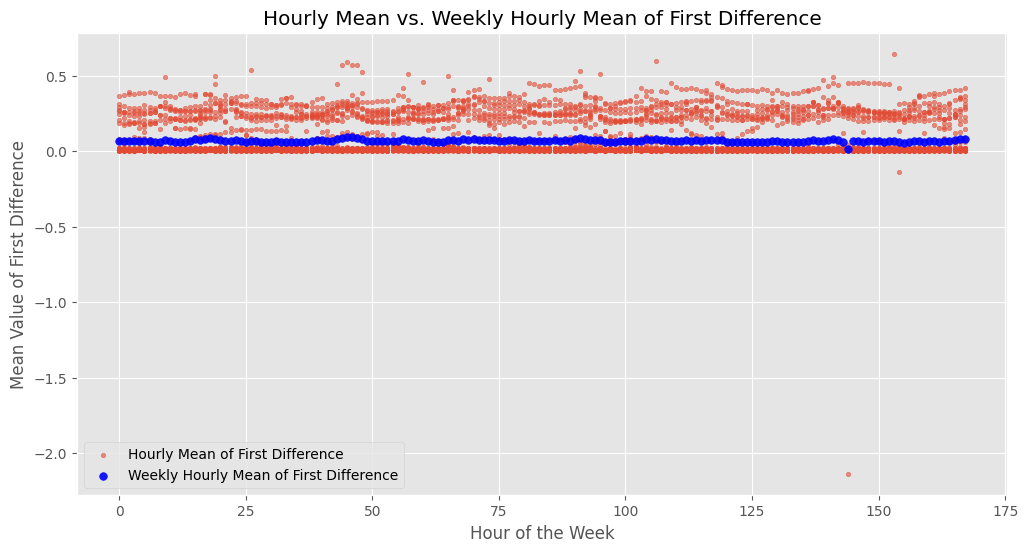

In [ ]:
feat=pd.read_csv('Energy Meter - EM_1.2.csv');
feat['Time (UTC)'] = pd.to_datetime(feat['Time (UTC)'])
func_hourofweek_3(feat)

Distribution==> KDE ==> before and After cleaning

In [ ]:
def dist(feat):
    feature = feat.columns[1]

    # Drop NA values from the feature column
    feat_cl = feat.dropna(subset=[feature])

    #Another layer of cleaning
    feat_cleaned = feat.dropna(subset=[feature])
    feat_cleaned = feat_cleaned[feat_cleaned[feature] != 0]
    mean = feat_cleaned[feature].mean()
    q1_val = feat_cleaned[feature].quantile(0.25)
    q3_val = feat_cleaned[feature].quantile(0.75)
    iqr_val = q3_val - q1_val

    # Calculate thresholds
    lower_threshold = q1_val - 1.5 * iqr_val
    upper_threshold = q3_val + 1.5 * iqr_val

    feat_final_cleaned = feat_cleaned[(feat_cleaned[feature] >= lower_threshold) & (feat_cleaned[feature] <= upper_threshold)]


    # Create a KDE plot for the distribution of the feature
    plt.figure(figsize=(12, 6))
    sns.kdeplot(feat_cl[feature], shade=True)
    # sns.kdeplot(feat_final_cleaned[feature], shade=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature} using KDE')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    # sns.kdeplot(feat_cl[feature], shade=True)
    sns.kdeplot(feat_final_cleaned[feature], shade=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature} using KDE')
    plt.grid(True)
    plt.show()


<ipython-input-38-3dc6ca530a2d>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(feat_cl[feature], shade=True)


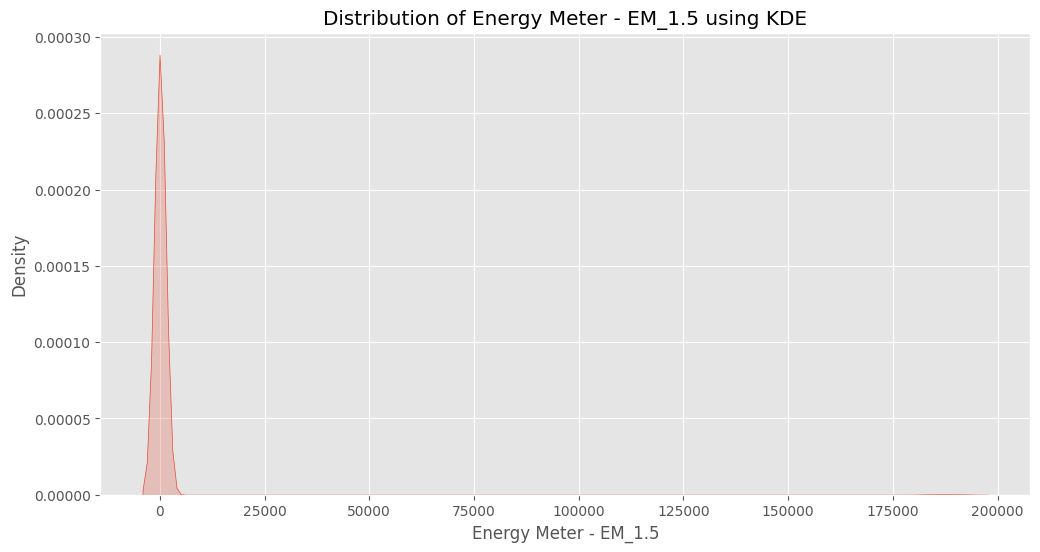

<ipython-input-38-3dc6ca530a2d>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(feat_final_cleaned[feature], shade=True)


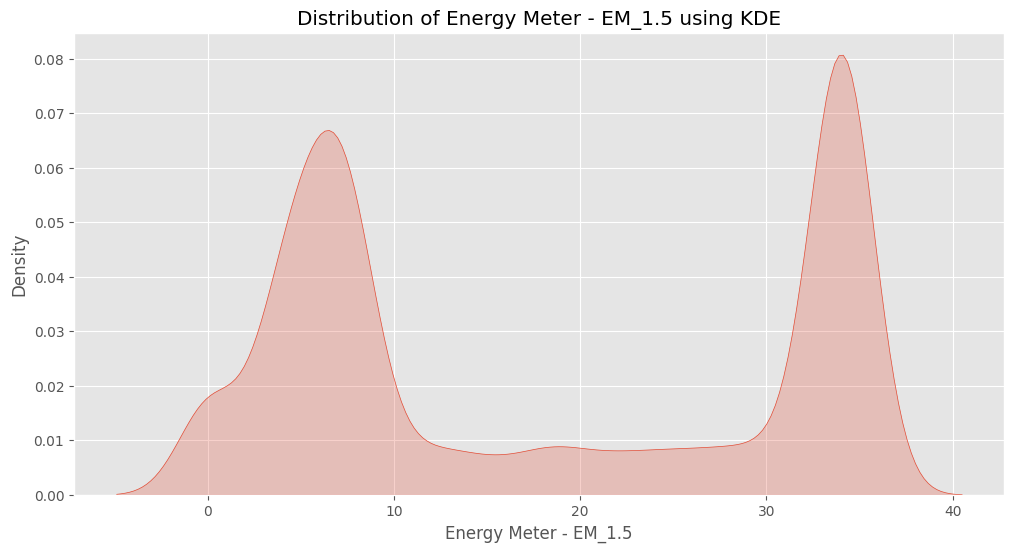

In [ ]:
feat=pd.read_csv('Energy Meter - EM_1.5.csv');
feat['Time (UTC)'] = pd.to_datetime(feat['Time (UTC)'])
dist(feat)

In [ ]:
#first difference
import pandas as pd
import matplotlib.pyplot as plt

def func_hourofweek_4(feat):
    feature = feat.columns[1]

    feat_cleaned = feat.dropna(subset=[feature])
    feat_cleaned = feat_cleaned[feat_cleaned[feature] != 0]
    mean = feat_cleaned[feature].mean()
    q1_val = feat_cleaned[feature].quantile(0.25)
    q3_val = feat_cleaned[feature].quantile(0.75)
    iqr_val = q3_val - q1_val

    # Calculate thresholds
    lower_threshold = q1_val - 1.5 * iqr_val
    upper_threshold = q3_val + 1.5 * iqr_val

    feat_final_cleaned = feat_cleaned[(feat_cleaned[feature] >= lower_threshold) & (feat_cleaned[feature] <= upper_threshold)]

    feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour
    feat_final_cleaned.set_index('Time (UTC)', inplace=True)

    # Compute the first difference of the feature
    feat_final_cleaned['First Difference'] = feat_final_cleaned[feature].diff()

    # Drop the NaN values created by differencing
    feat_final_cleaned = feat_final_cleaned.dropna(subset=['First Difference'])

    # Calculate new thresholds for the first difference
    first_diff_mean = feat_final_cleaned['First Difference'].mean()
    first_diff_q1 = feat_final_cleaned['First Difference'].quantile(0.25)
    first_diff_q3 = feat_final_cleaned['First Difference'].quantile(0.75)
    first_diff_iqr = first_diff_q3 - first_diff_q1

    lower_threshold_diff = first_diff_q1 - 1.5 * first_diff_iqr
    upper_threshold_diff = first_diff_q3 + 1.5 * first_diff_iqr

    # Apply new thresholds to the first difference data
    feat_final_cleaned = feat_final_cleaned[(feat_final_cleaned['First Difference'] >= lower_threshold_diff) & (feat_final_cleaned['First Difference'] <= upper_threshold_diff)]

    hourly_mean = feat_final_cleaned.resample('H')['First Difference'].mean().reset_index()

    # Add 'Hour of Week' column to the hourly_mean DataFrame
    hourly_mean['Hour of Week'] = hourly_mean['Time (UTC)'].dt.weekday * 24 + hourly_mean['Time (UTC)'].dt.hour

    # Calculate mean for each hour of the week over the entire duration
    weekly_hourly_mean = hourly_mean.groupby('Hour of Week')['First Difference'].mean().reset_index()

    # Plot both the original hourly means and the weekly aggregated means as scatter plots
    plt.figure(figsize=(12, 6))
    # plt.scatter(hourly_mean['Hour of Week'], hourly_mean['First Difference'], label='Hourly Mean of First Difference', s=10, alpha=0.6, color='b')
    # plt.scatter(weekly_hourly_mean['Hour of Week'], weekly_hourly_mean['First Difference'], label='Weekly Hourly Mean of First Difference', s=30, alpha=0.9)
    plt.plot(weekly_hourly_mean['Hour of Week'], weekly_hourly_mean['First Difference'], label='Weekly Hourly Mean of First Difference',marker='o', linestyle='-', markersize=2)

    plt.xlabel('Hour of the Week')
    plt.ylabel('Mean Value of First Difference')
    plt.title('Hourly Mean vs. Weekly Hourly Mean of First Difference')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sample usage
# feat = pd.read_csv('your_data.csv', parse_dates=['Time (UTC)'])
# func_weekly_1(feat)


<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


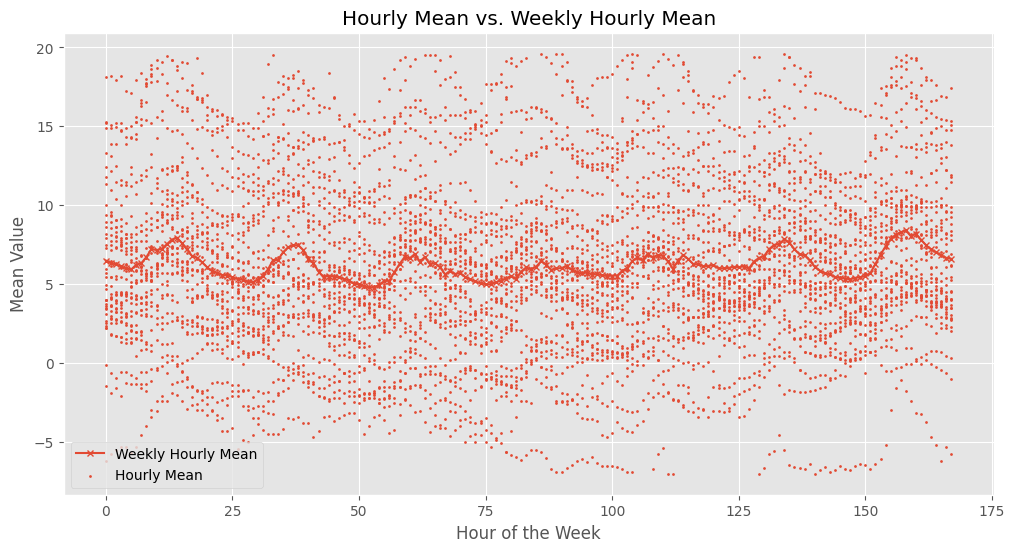

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


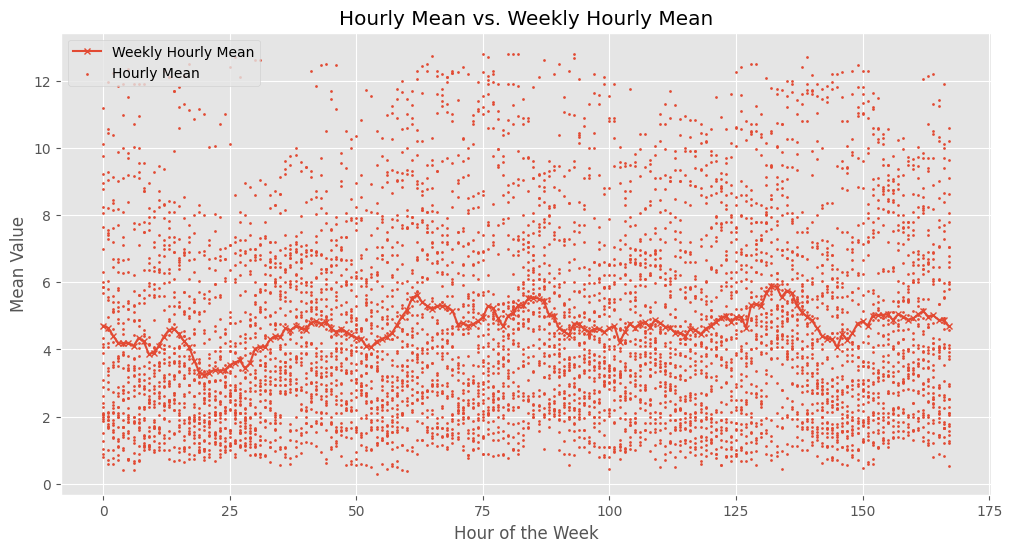

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


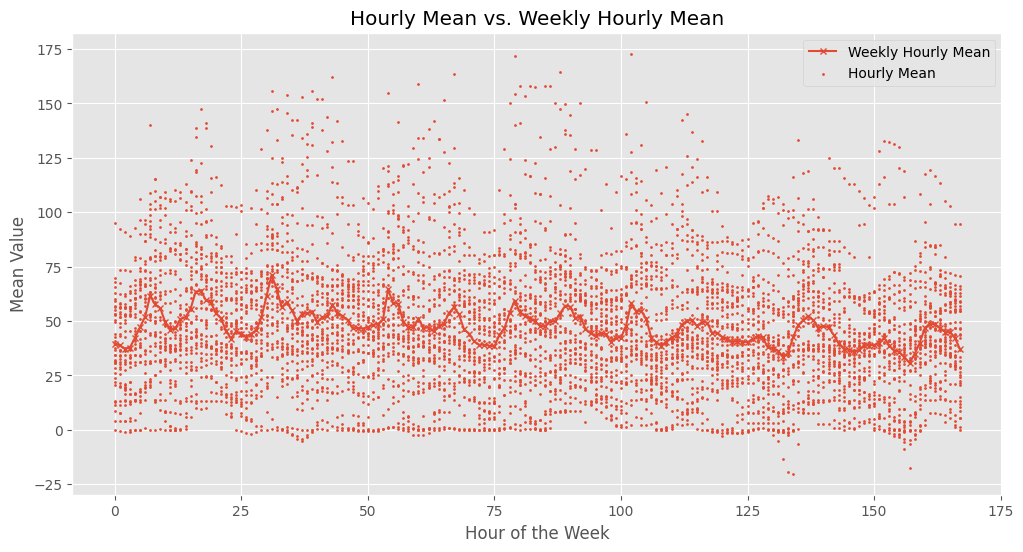

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


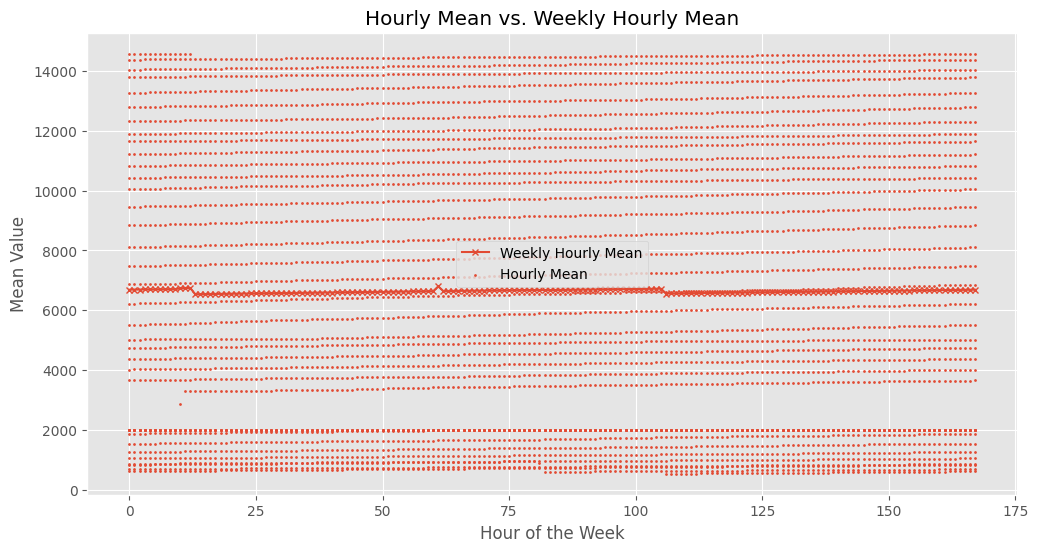

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


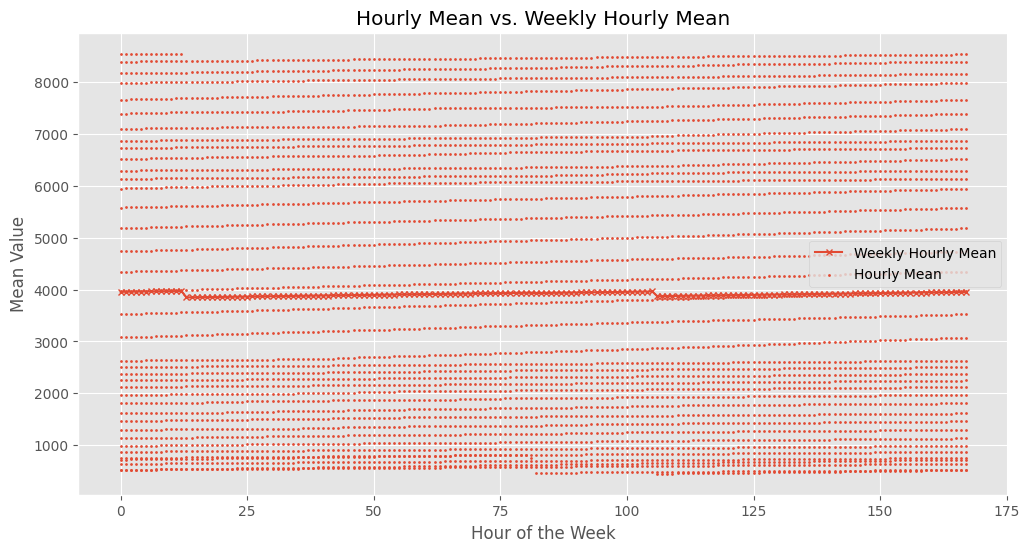

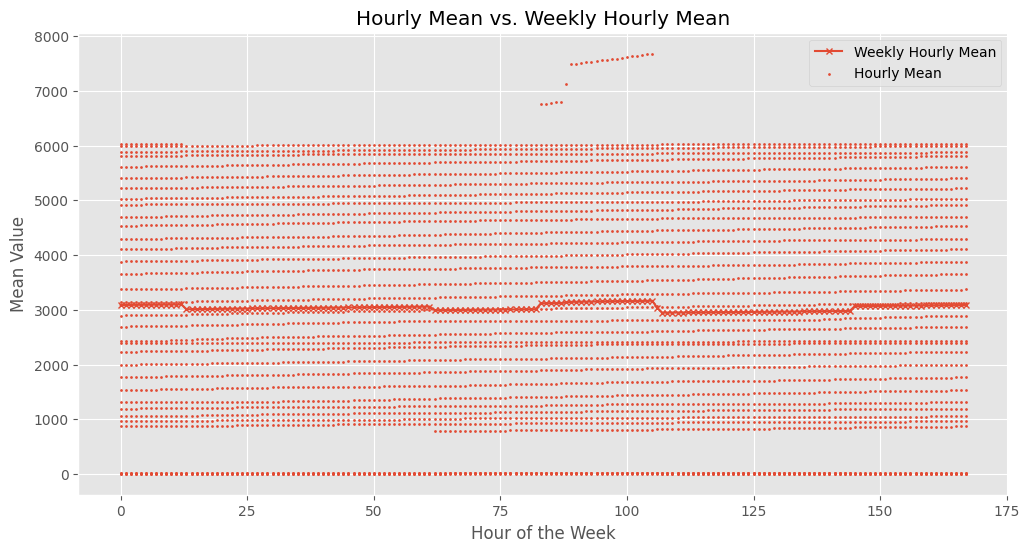

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


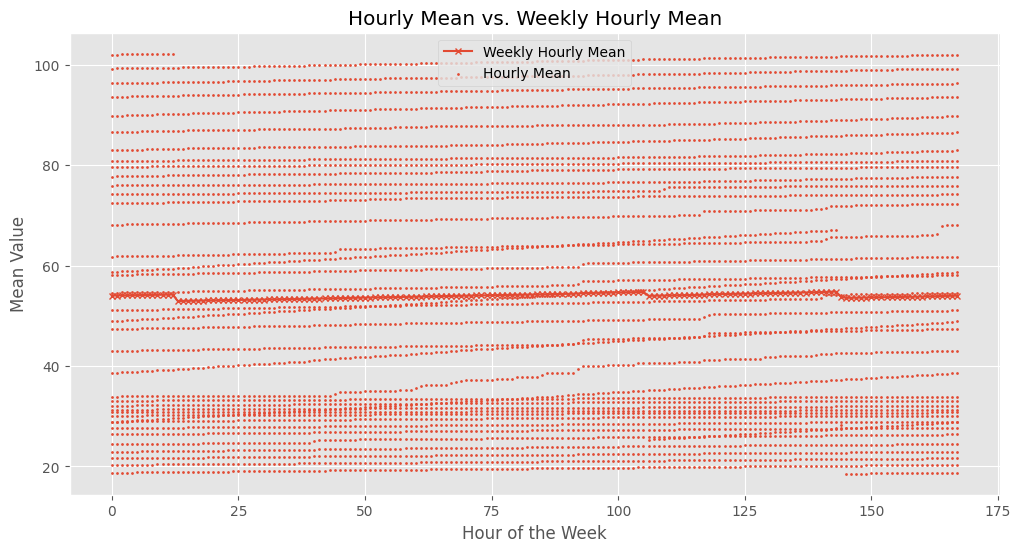

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


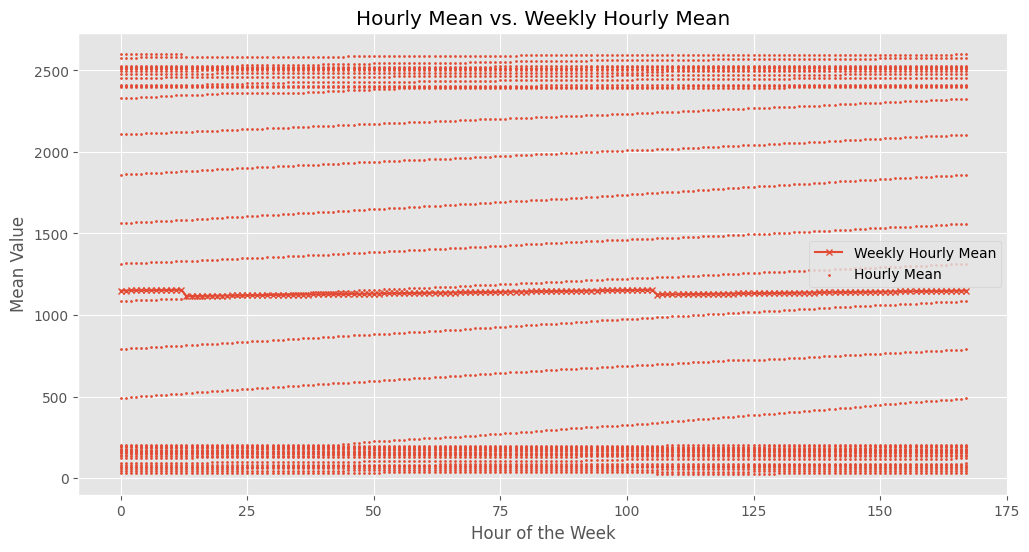

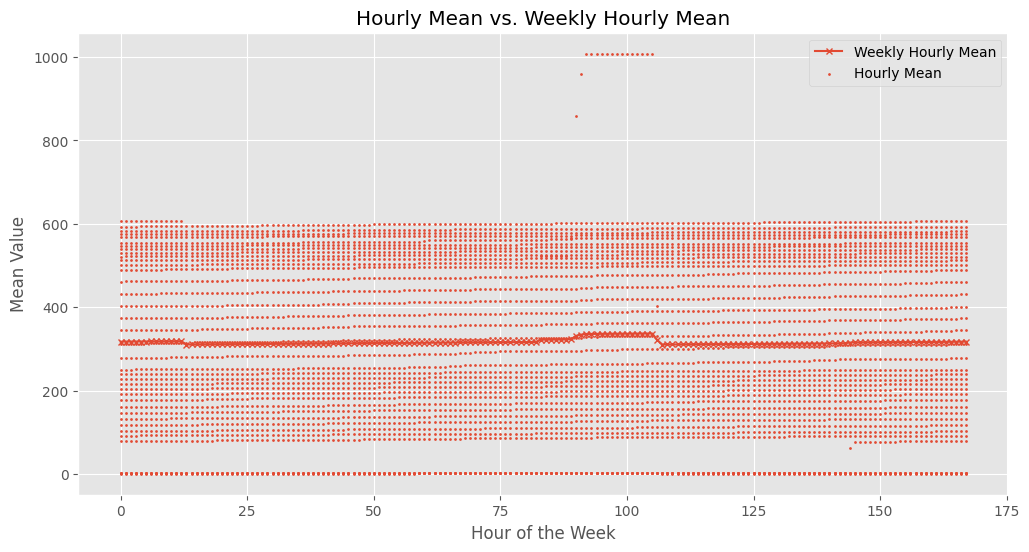

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


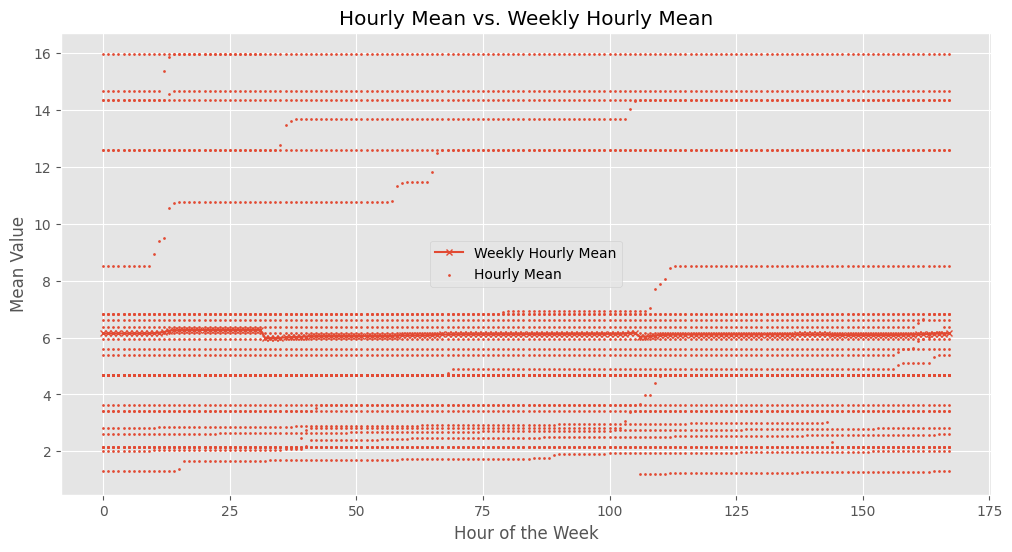

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


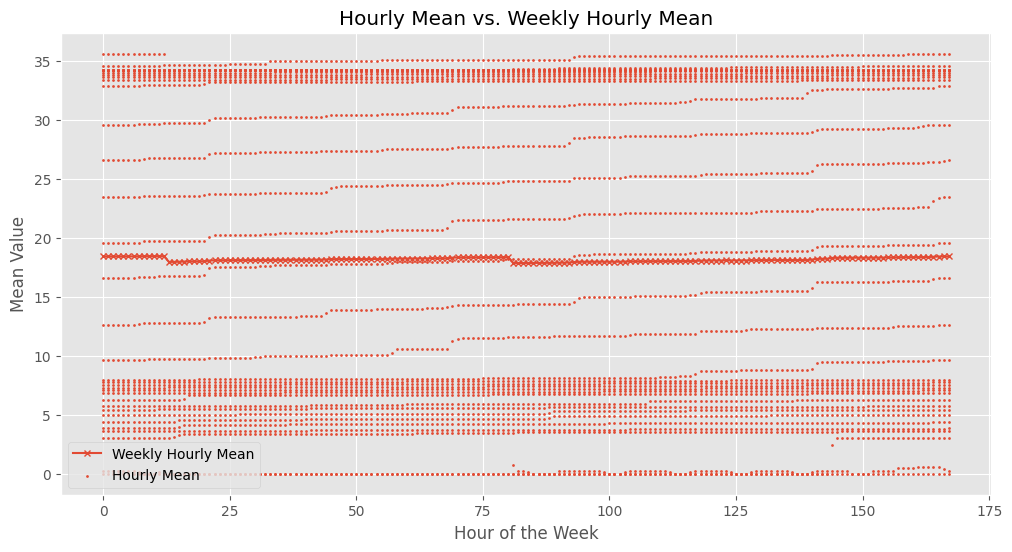

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


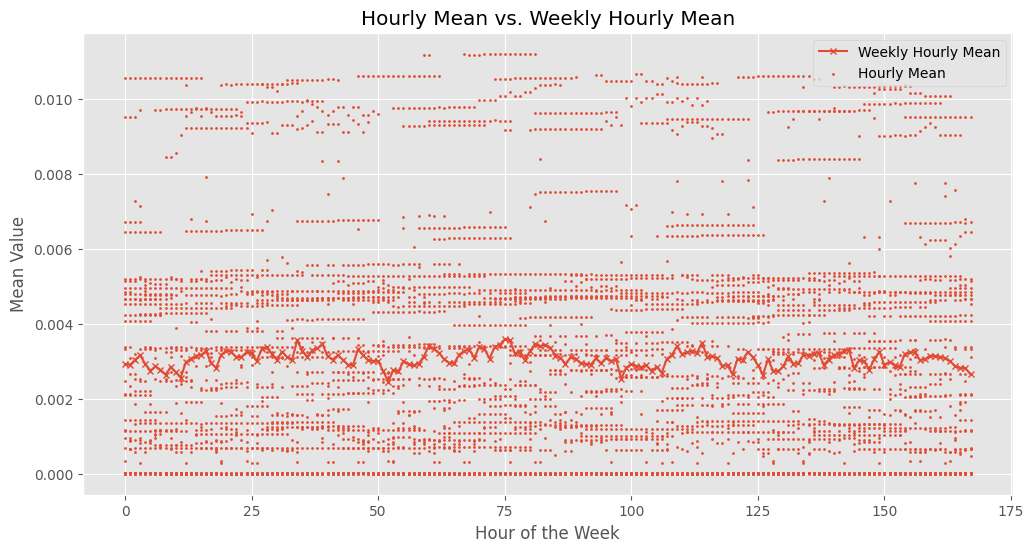

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


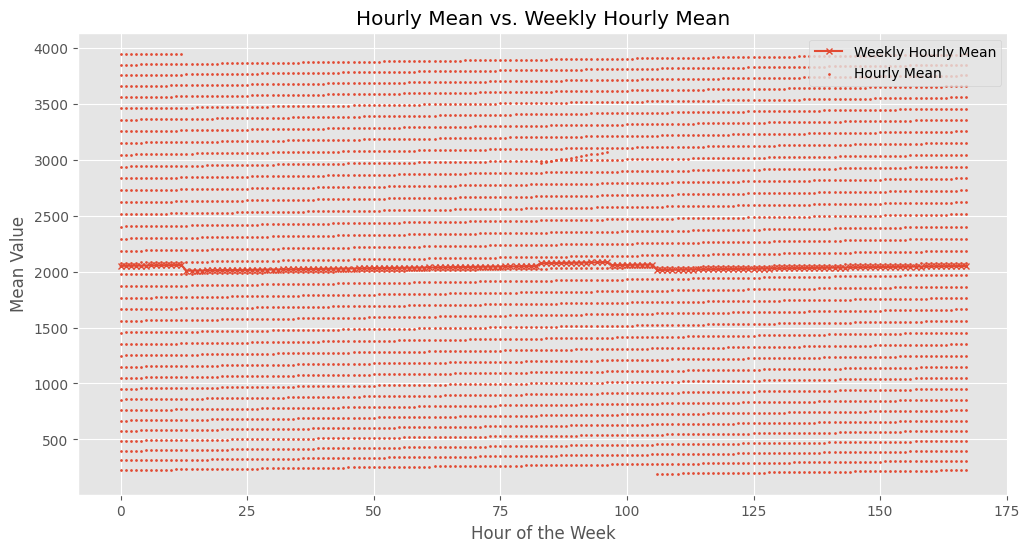

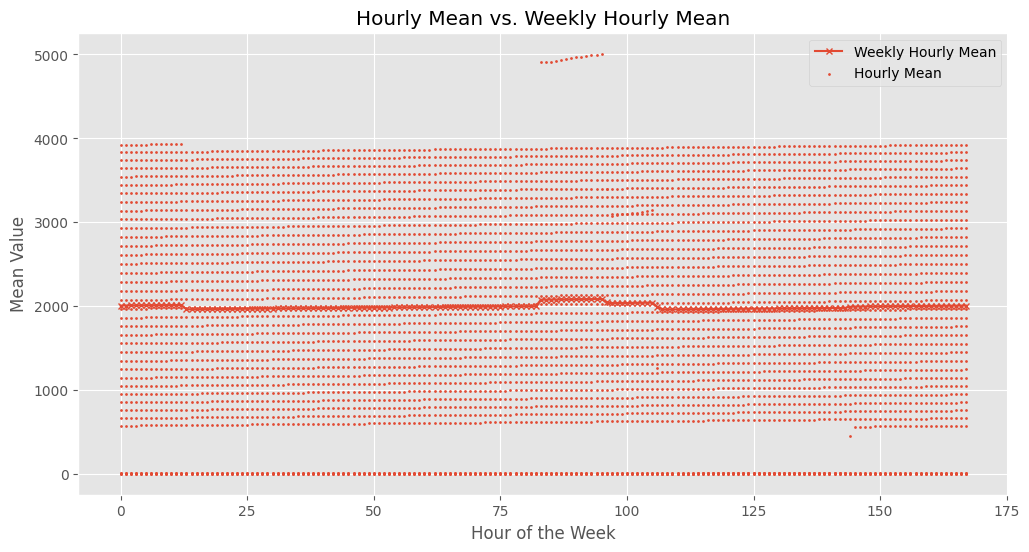

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


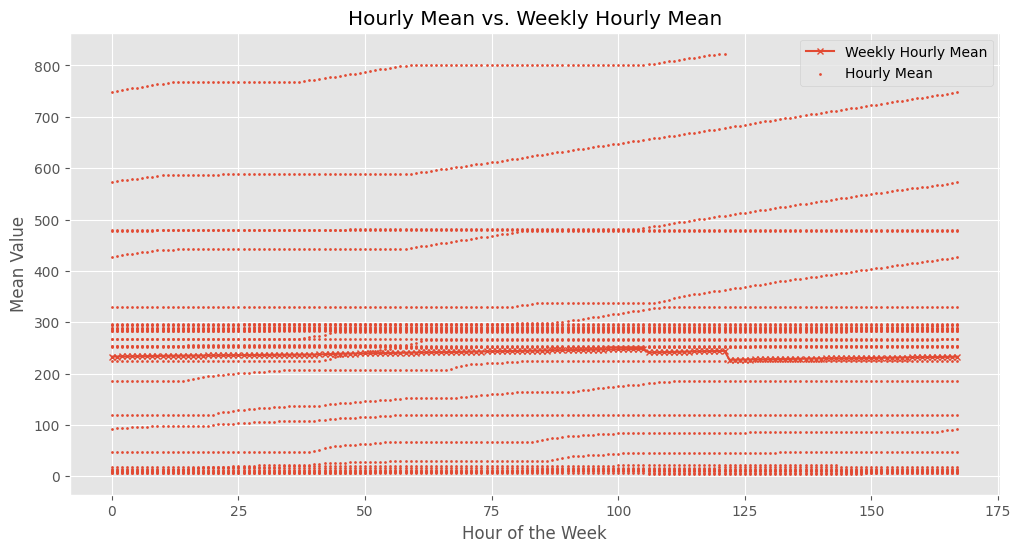

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


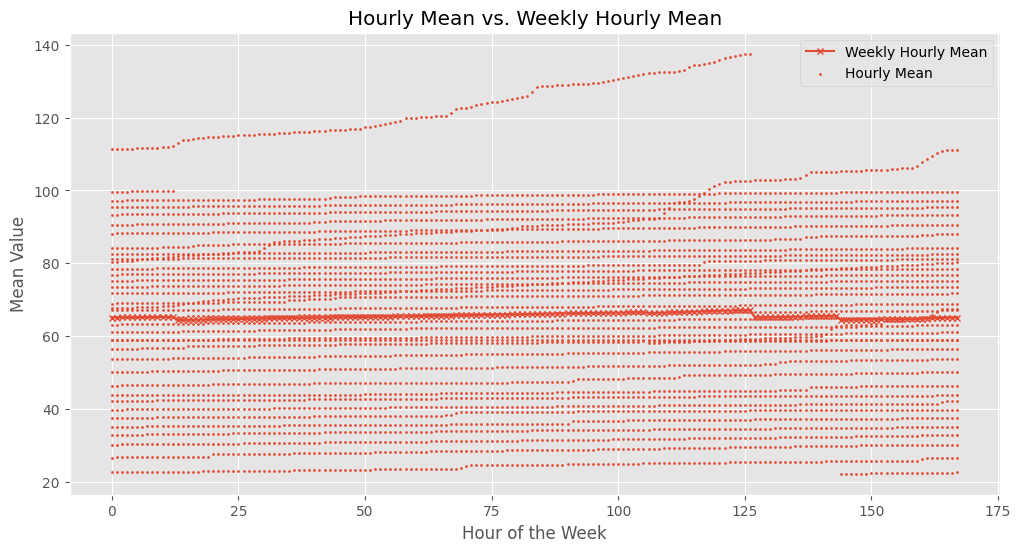

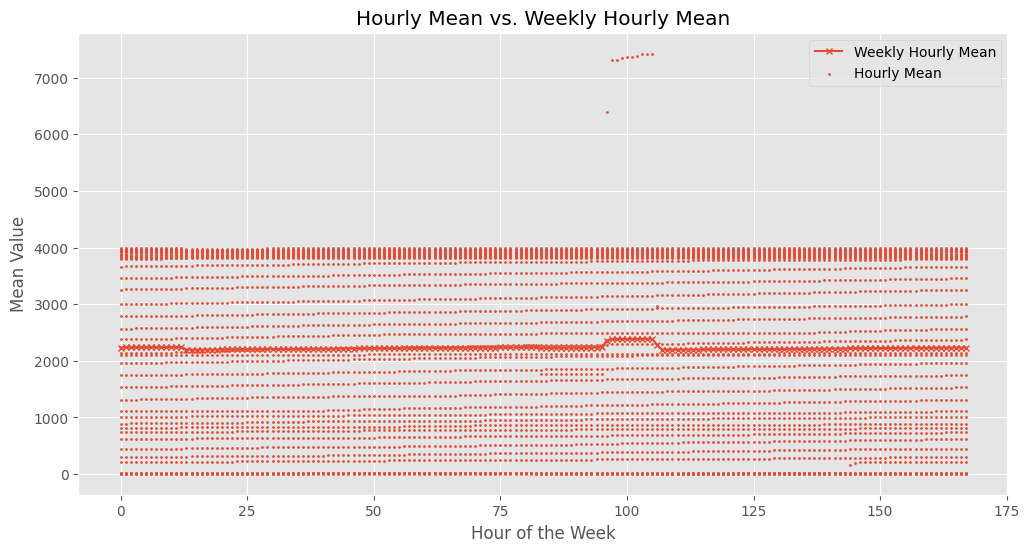

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


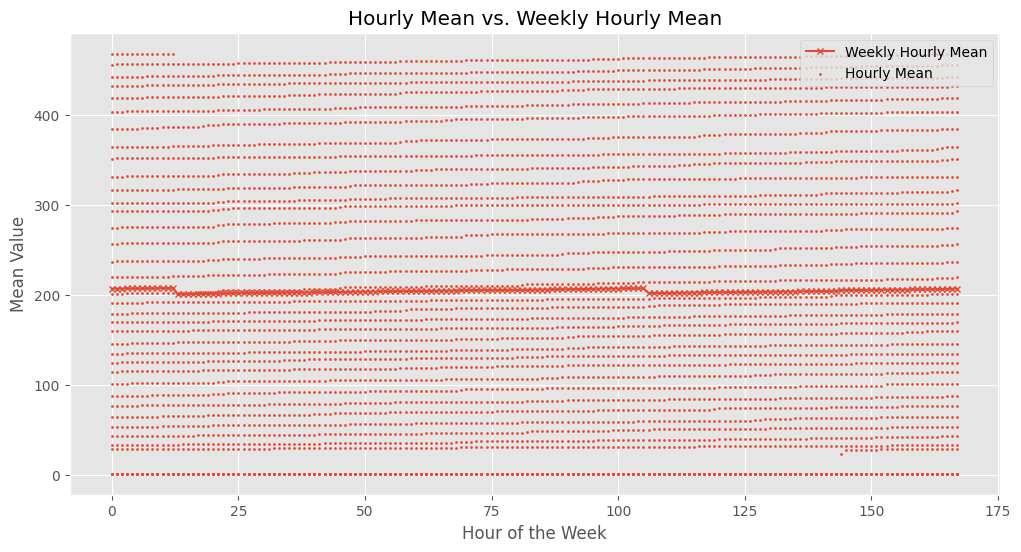

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


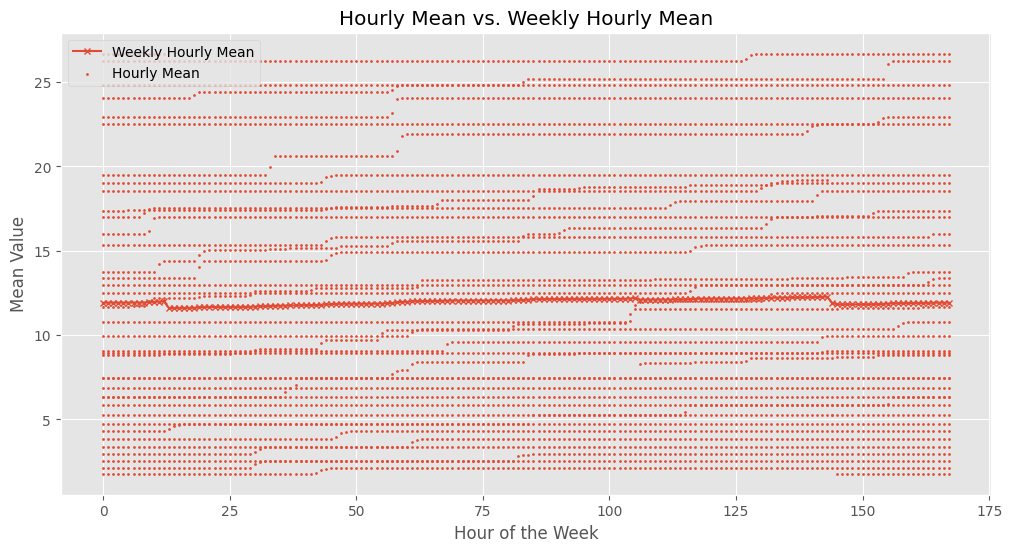

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


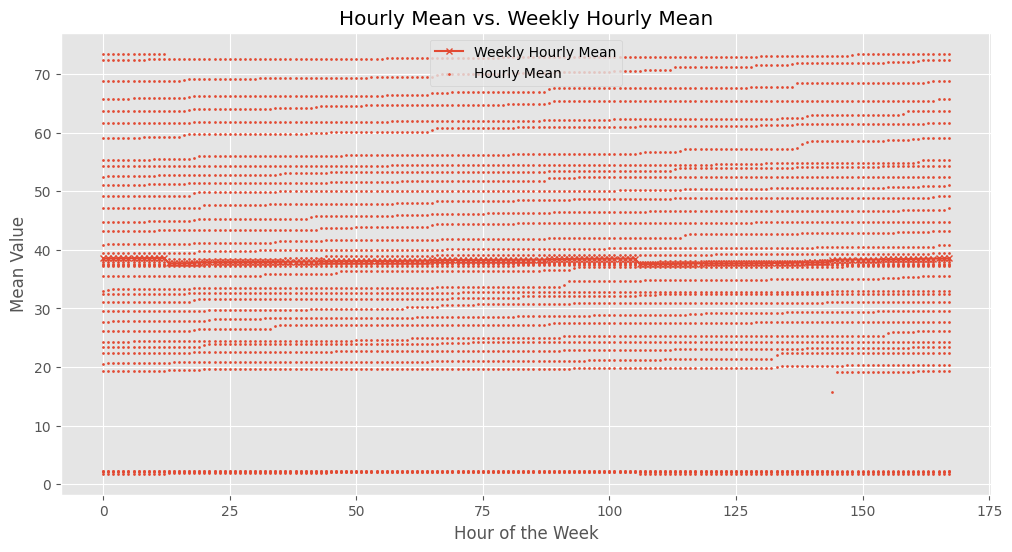

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


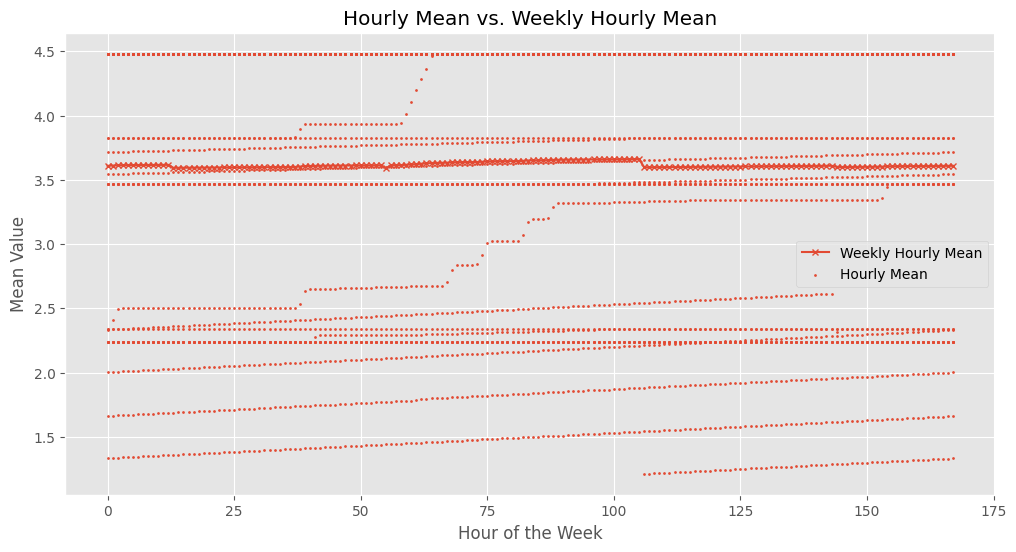

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


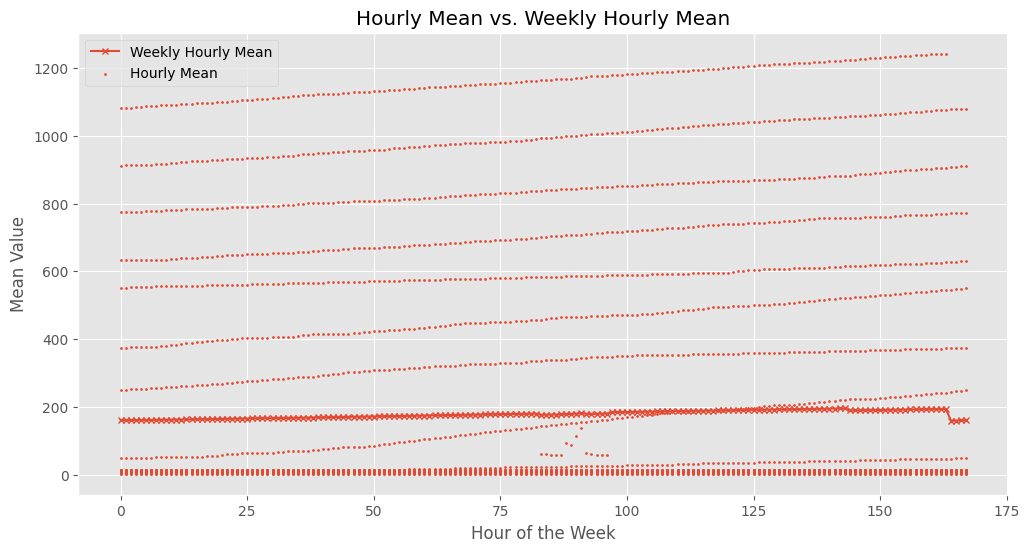

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


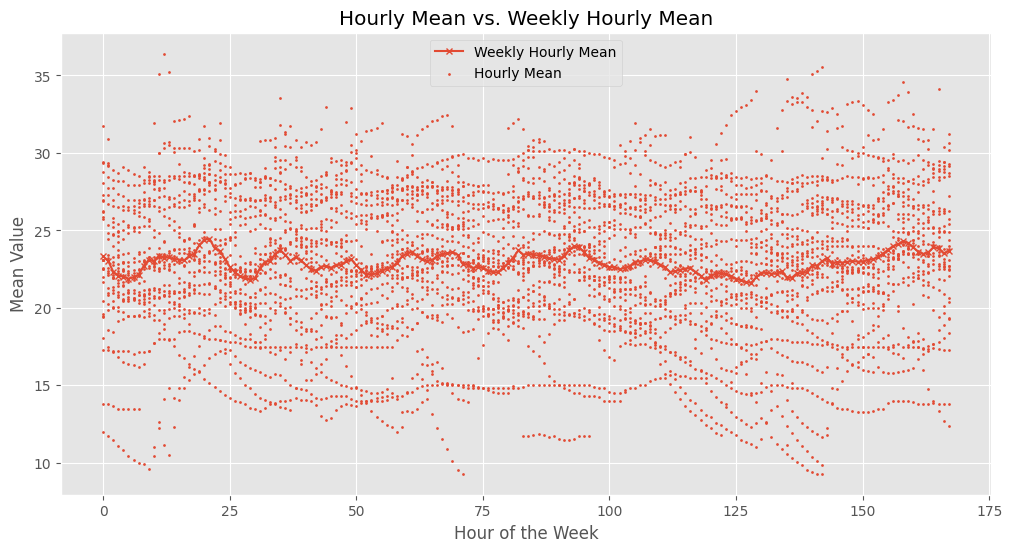

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


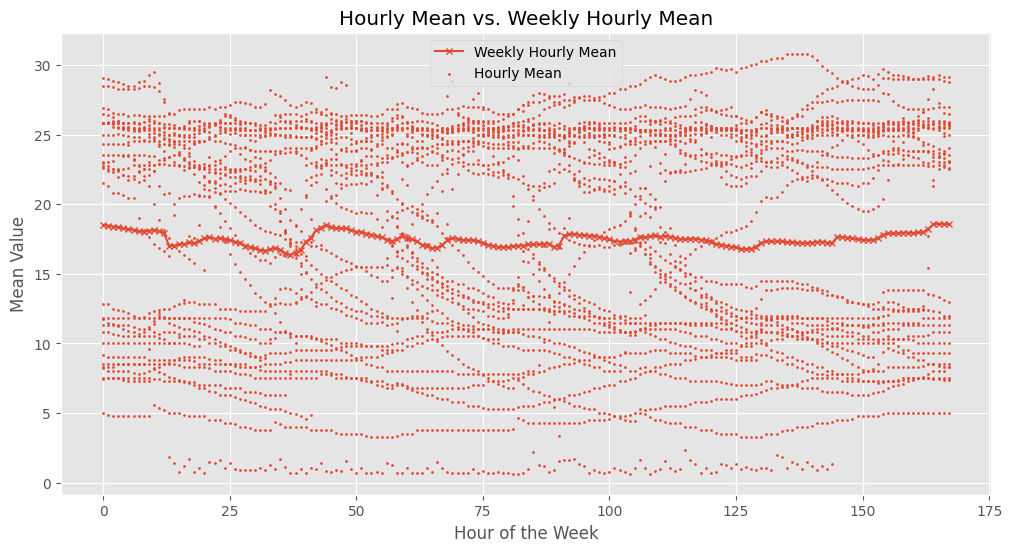

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


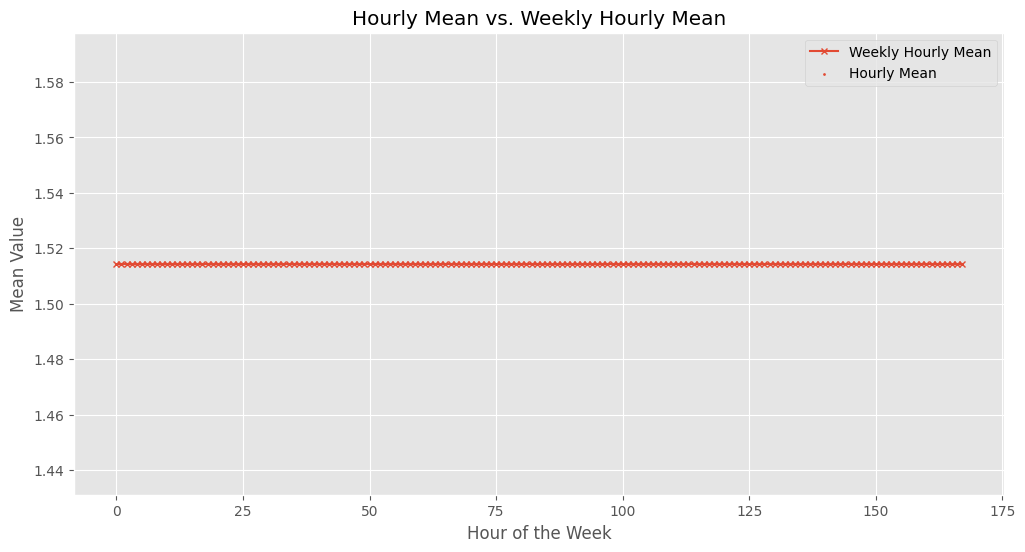

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


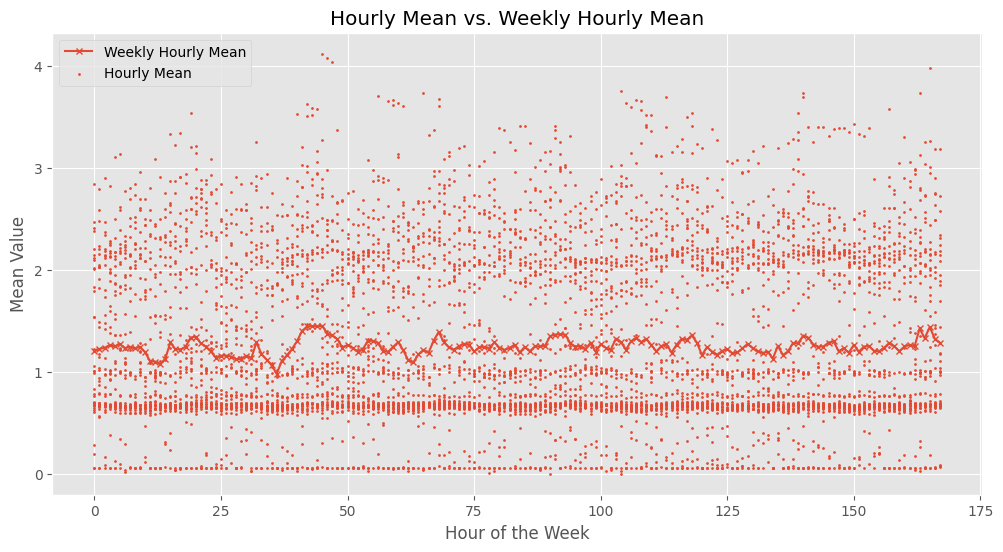

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


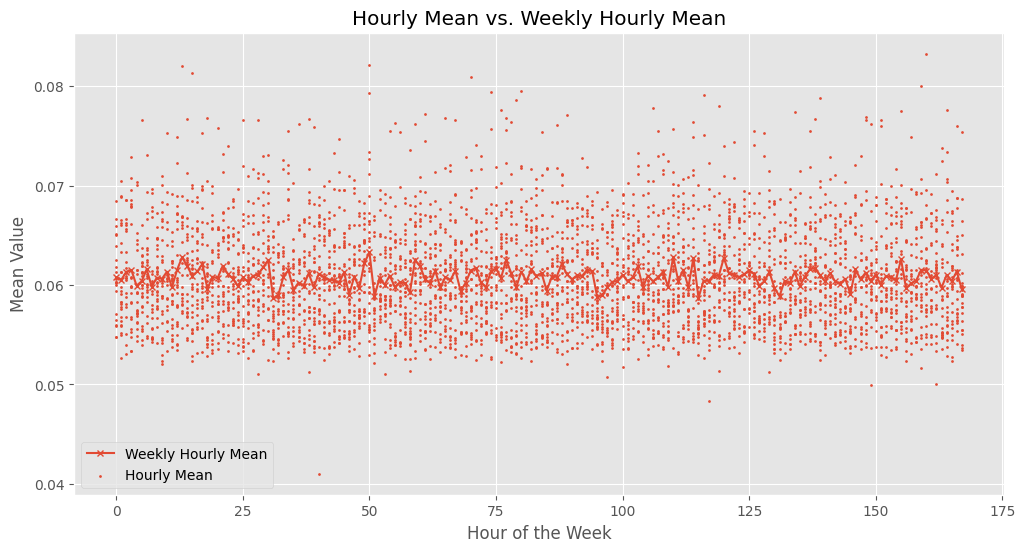

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


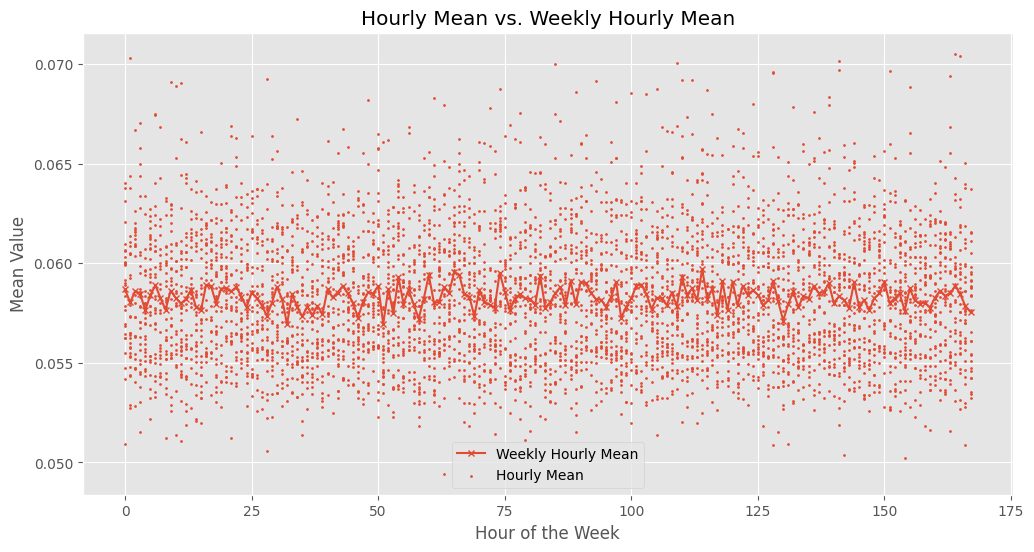

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


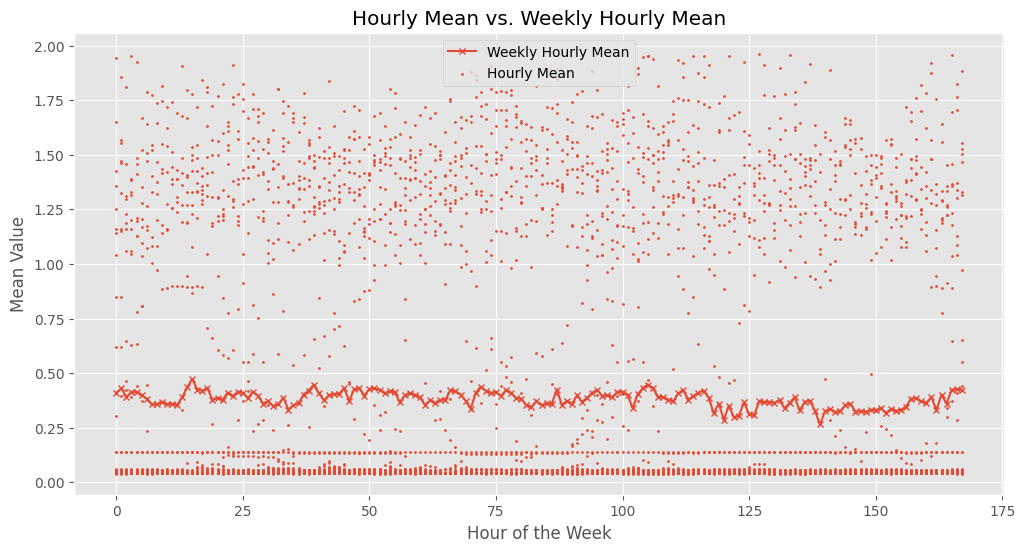

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


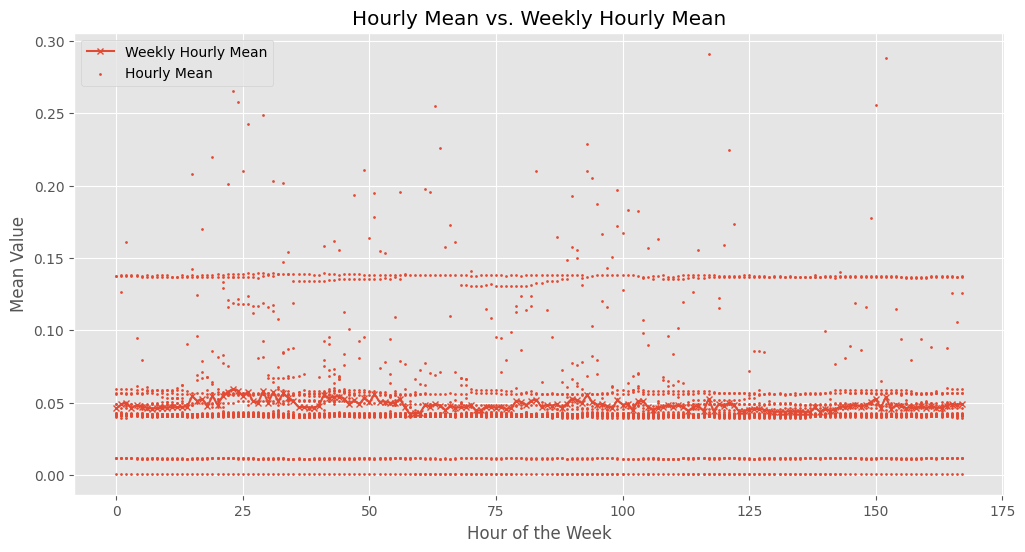

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


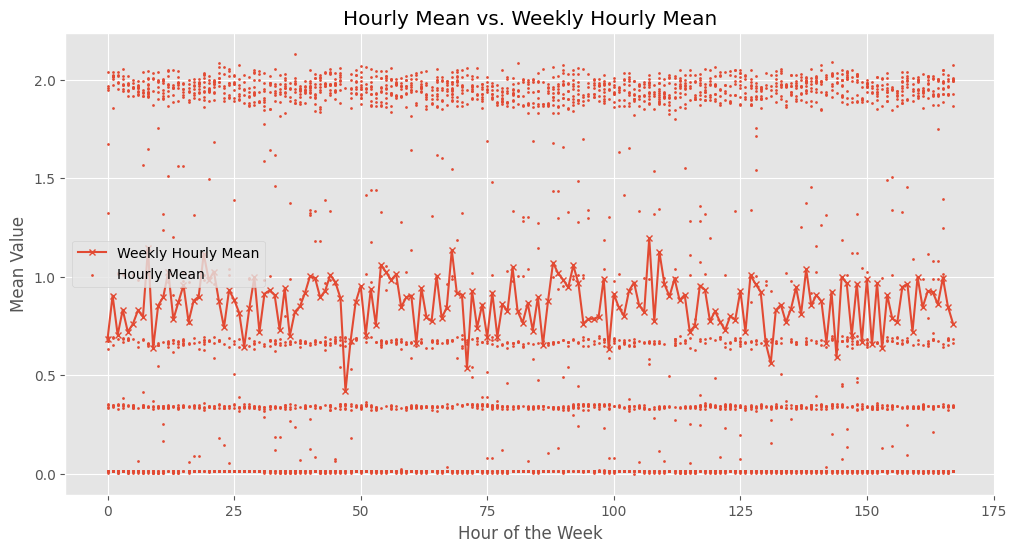

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


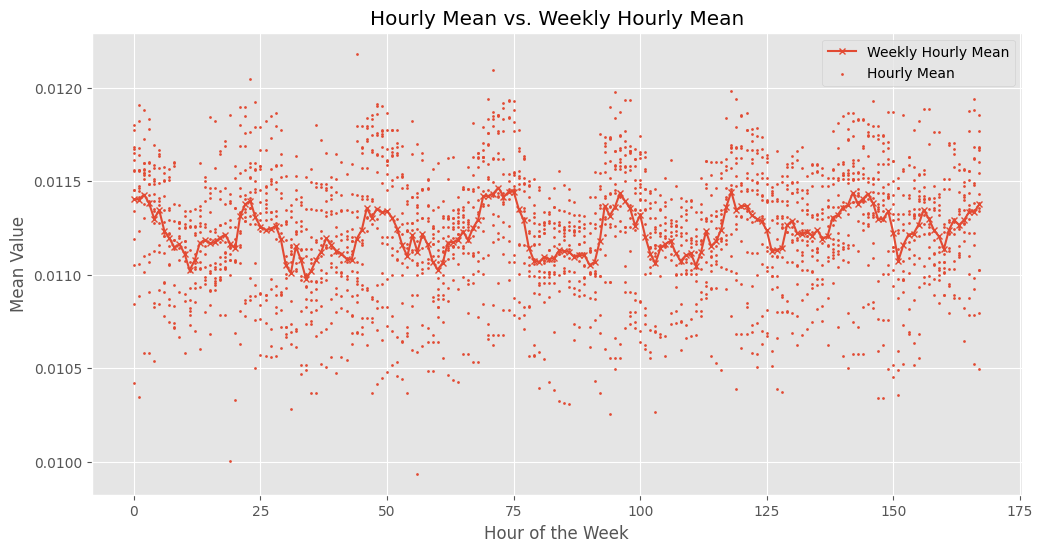

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


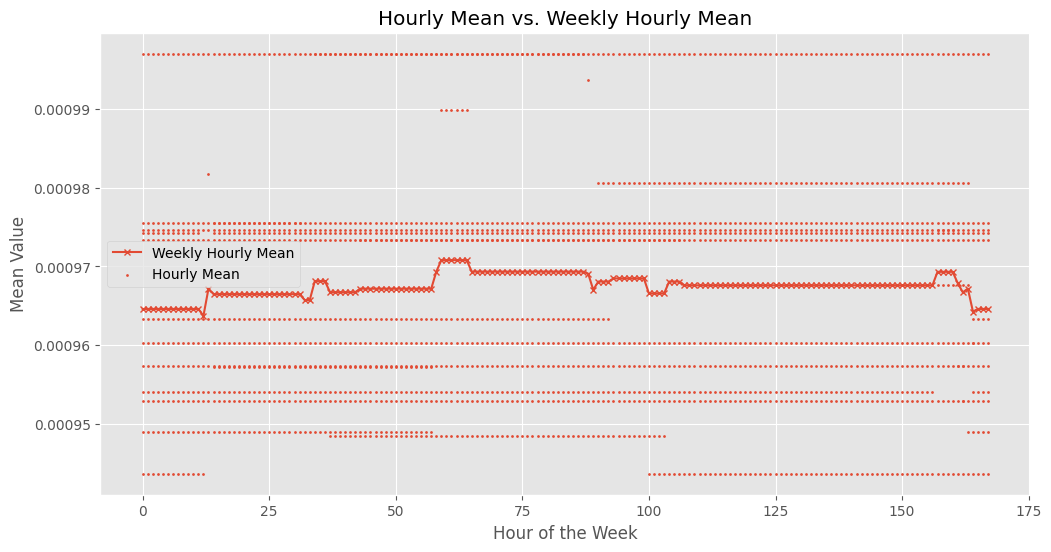

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


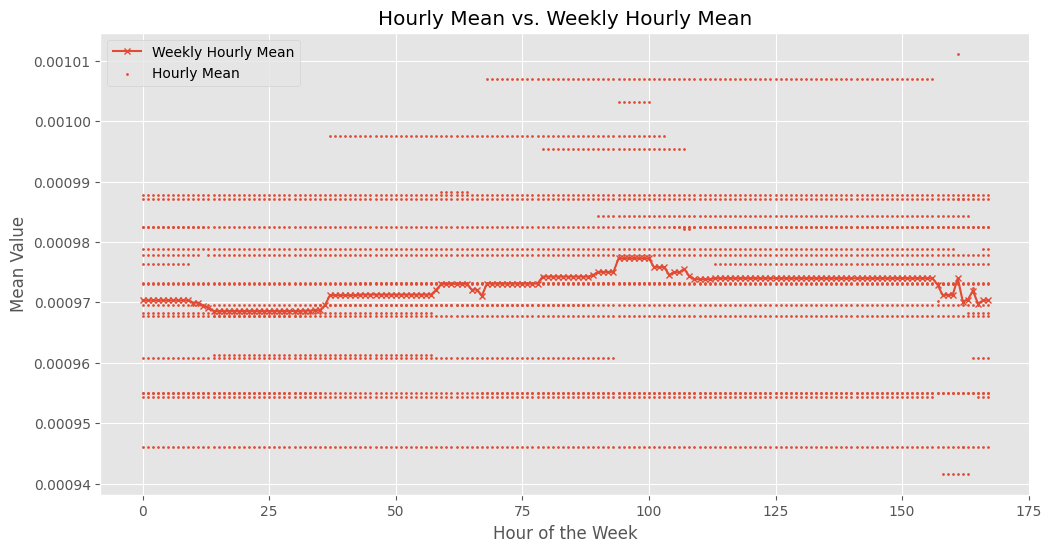

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


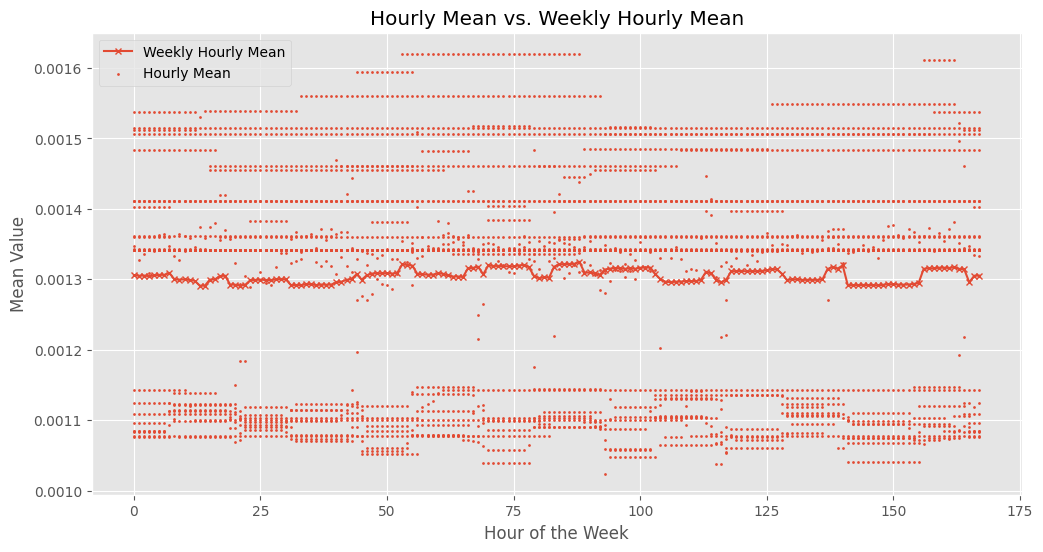

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


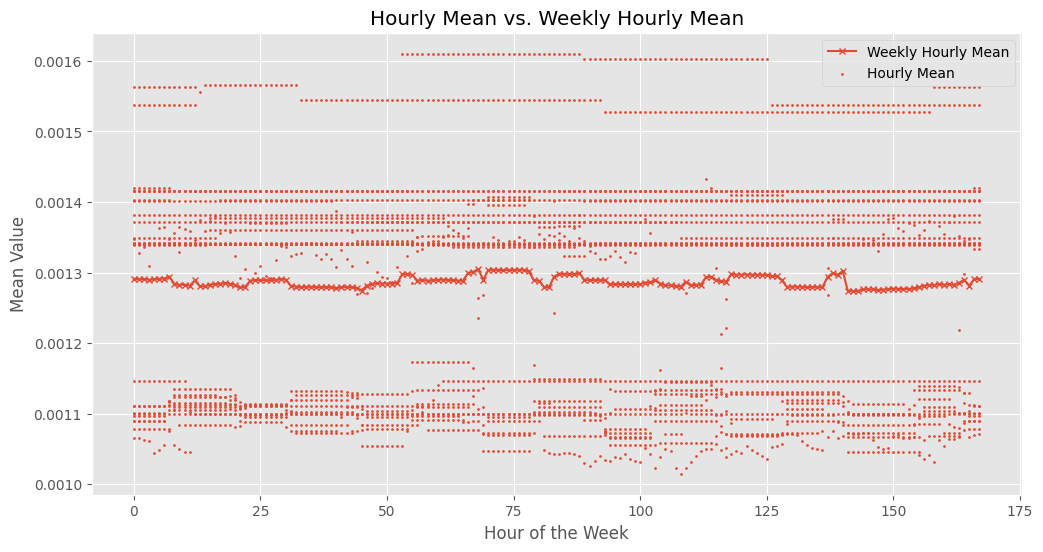

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


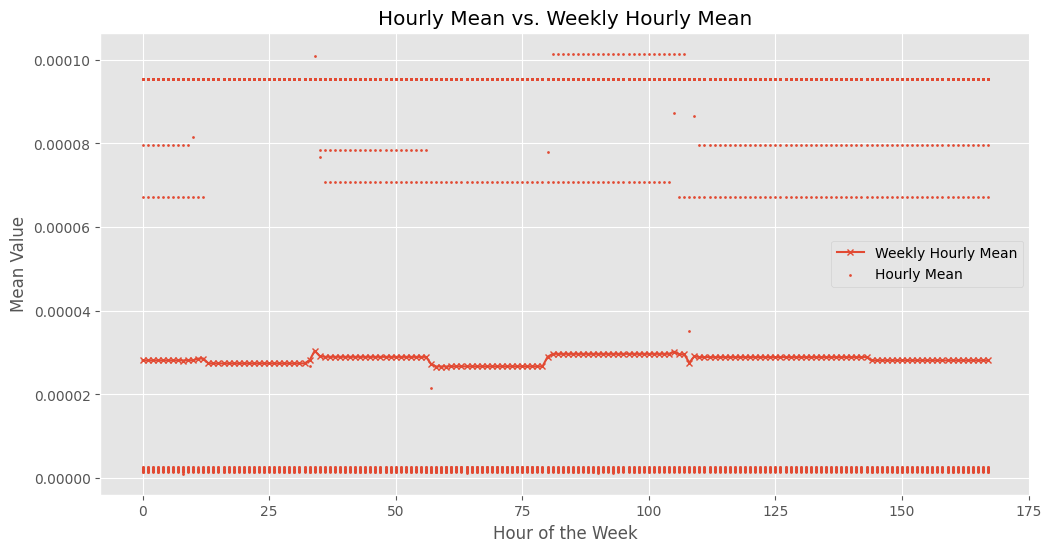

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


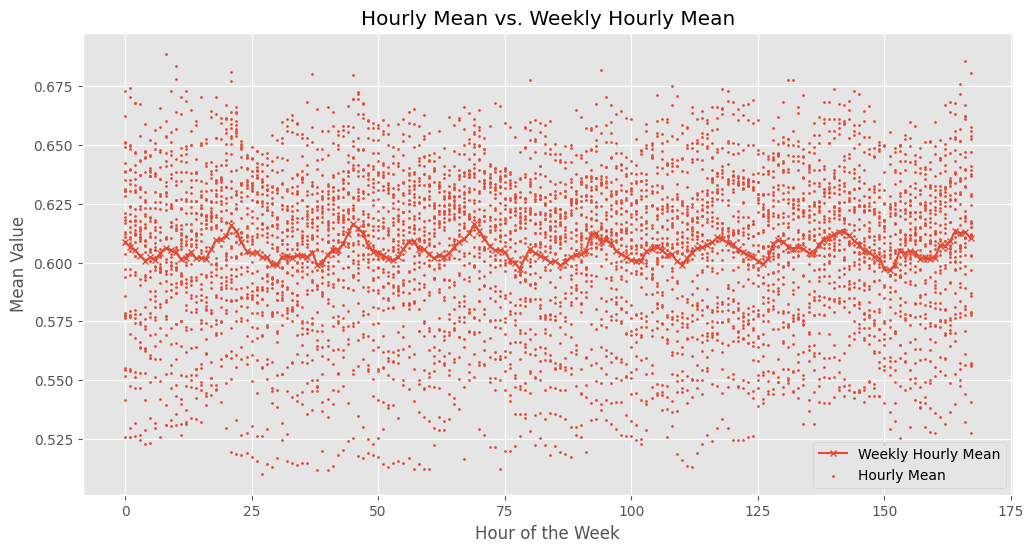

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


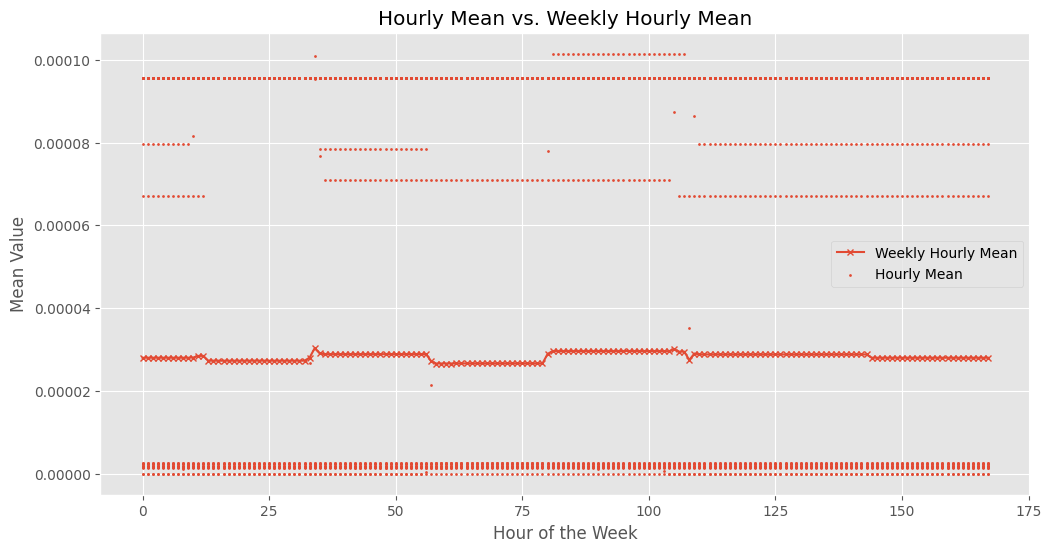

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


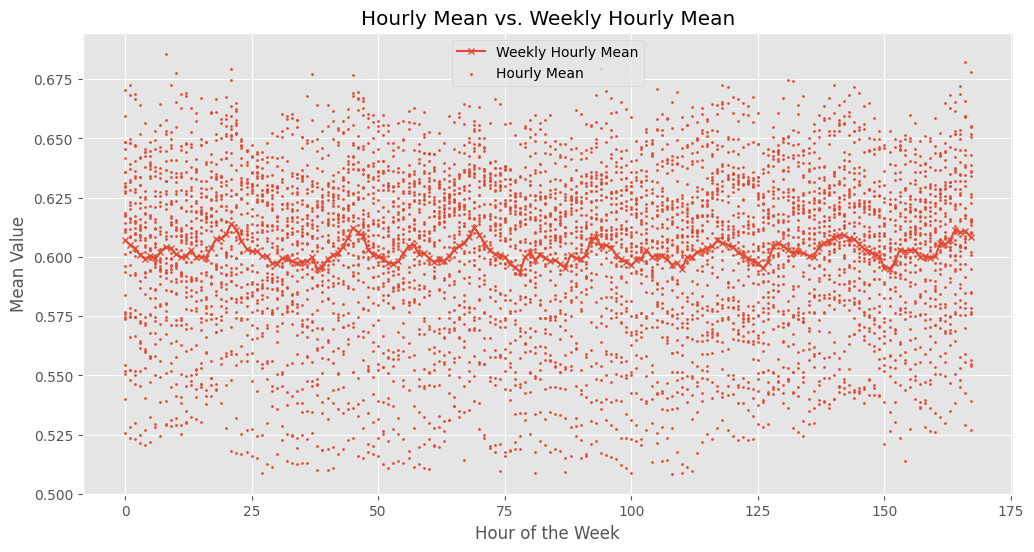

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


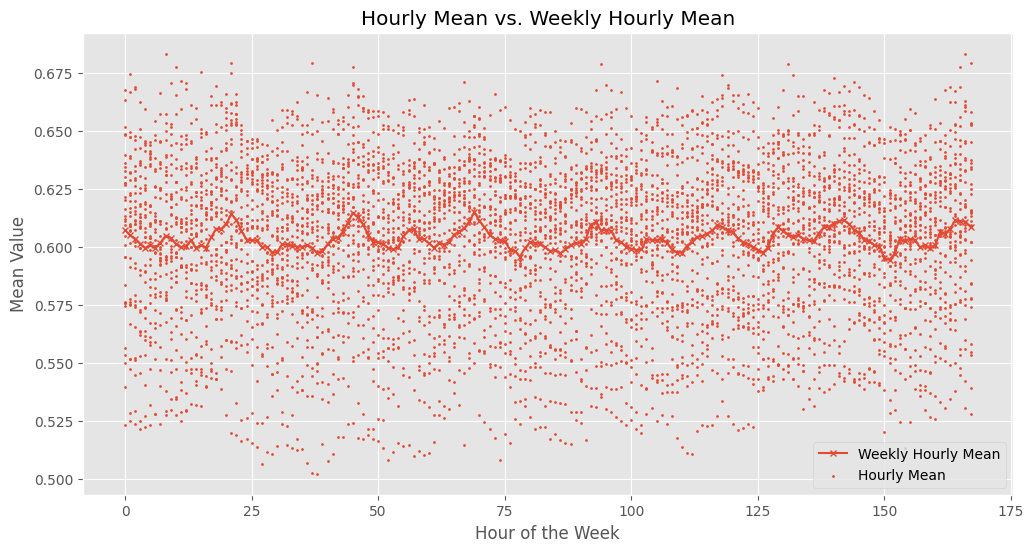

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


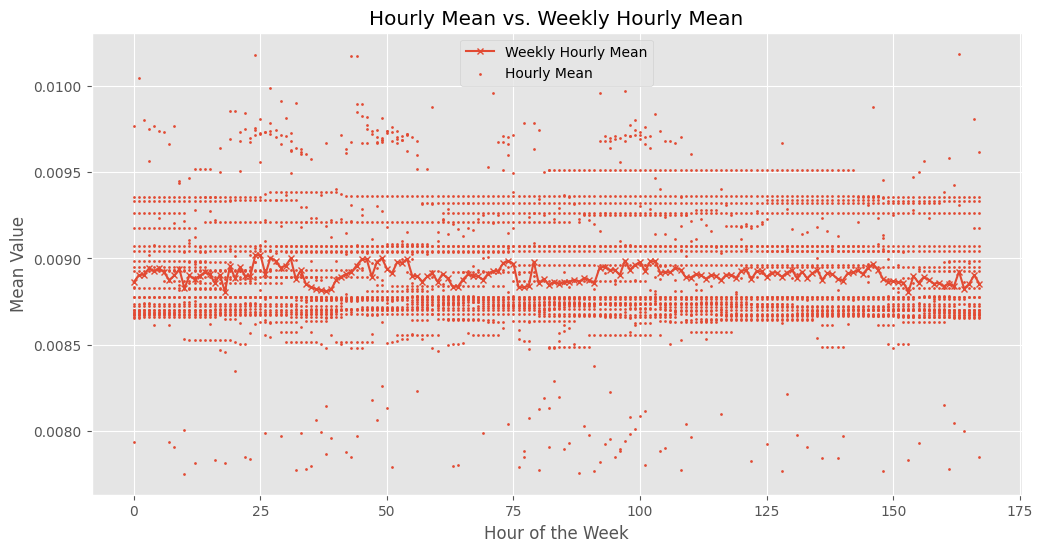

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


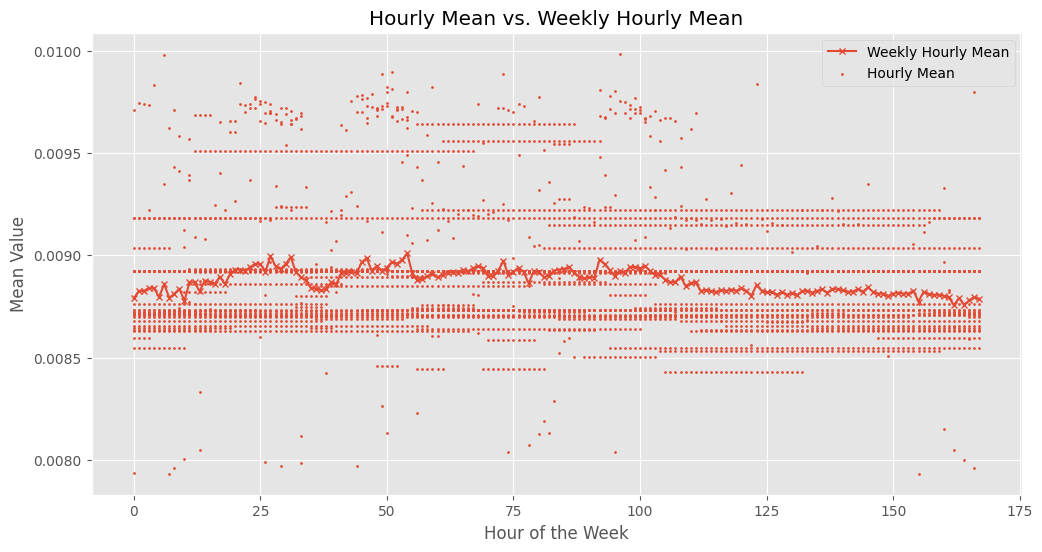

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


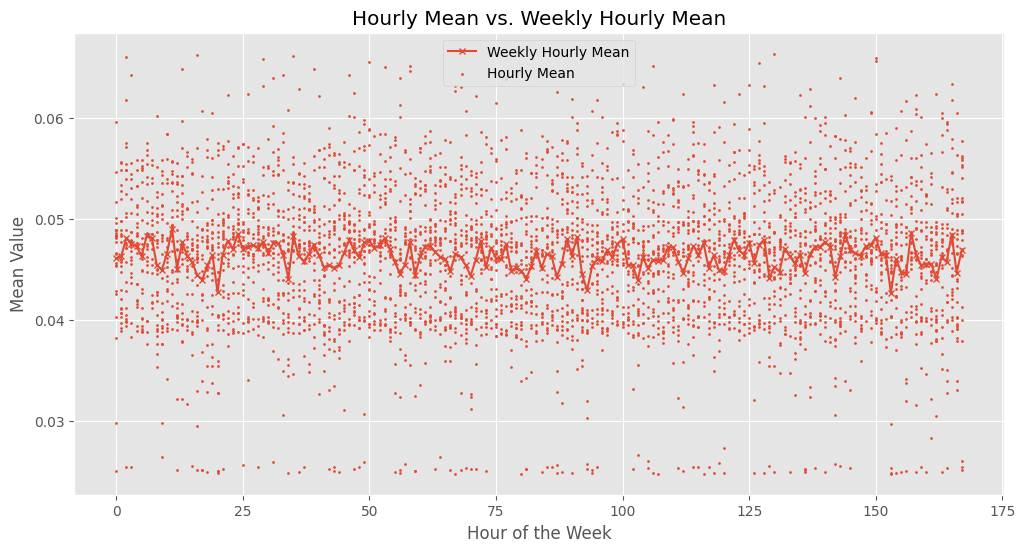

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


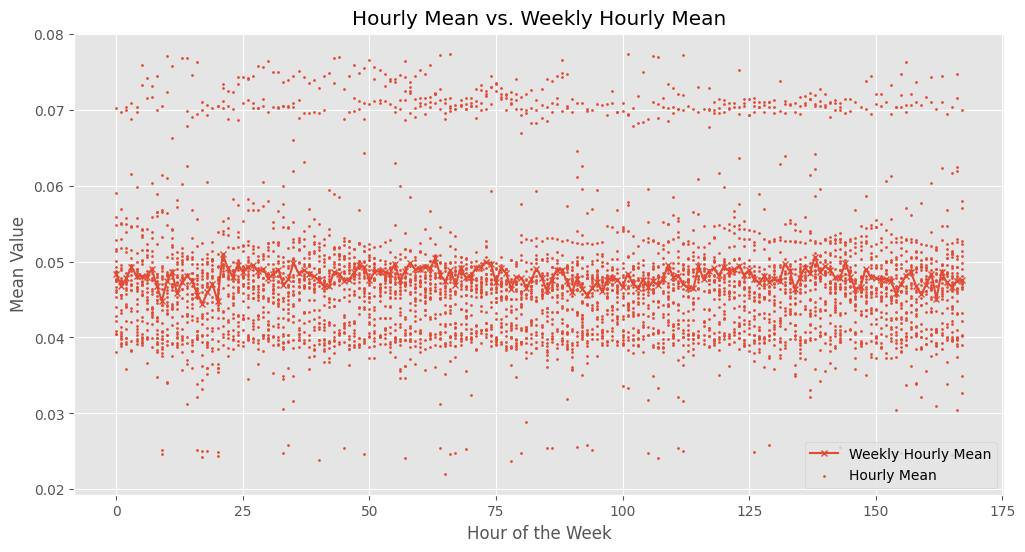

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


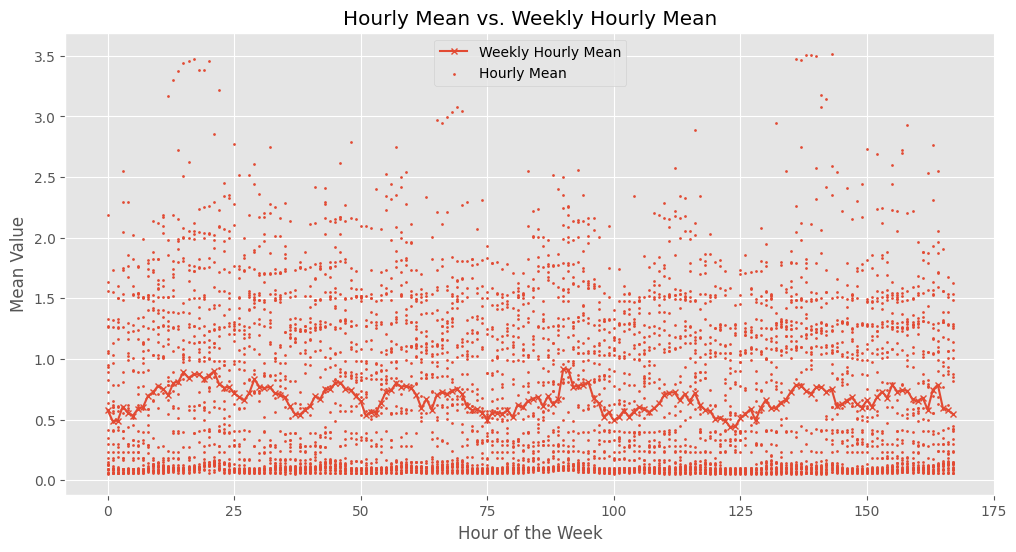

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


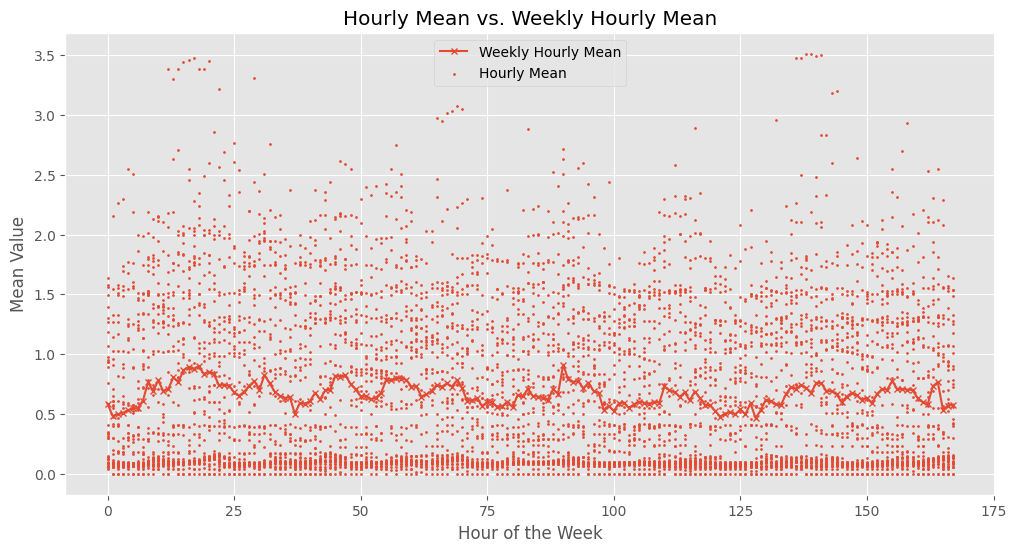

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


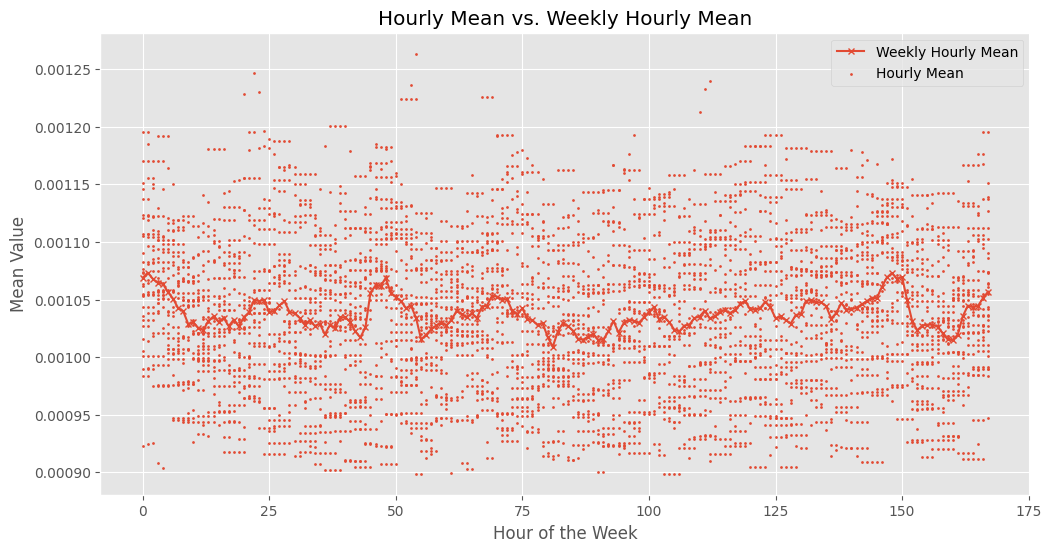

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


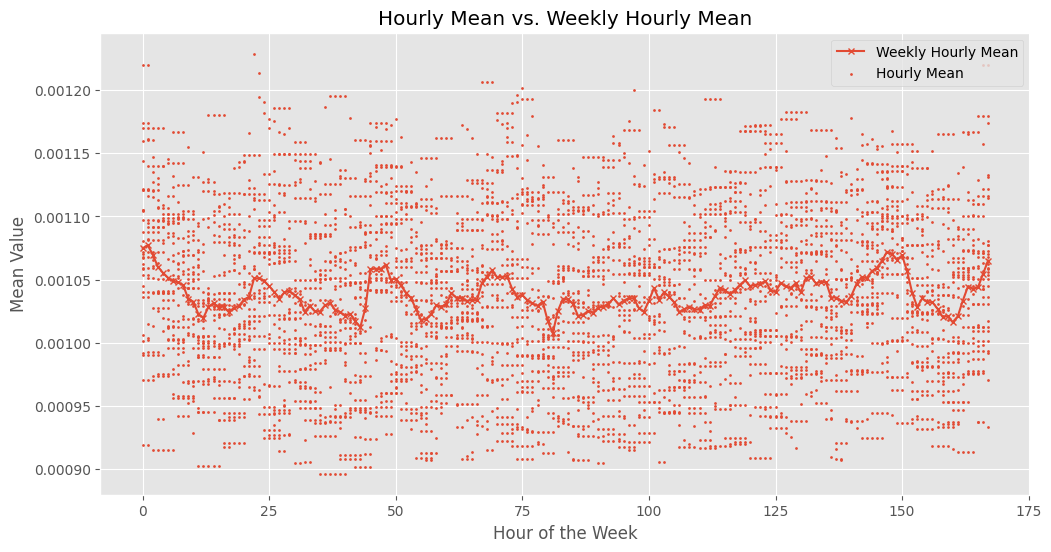

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


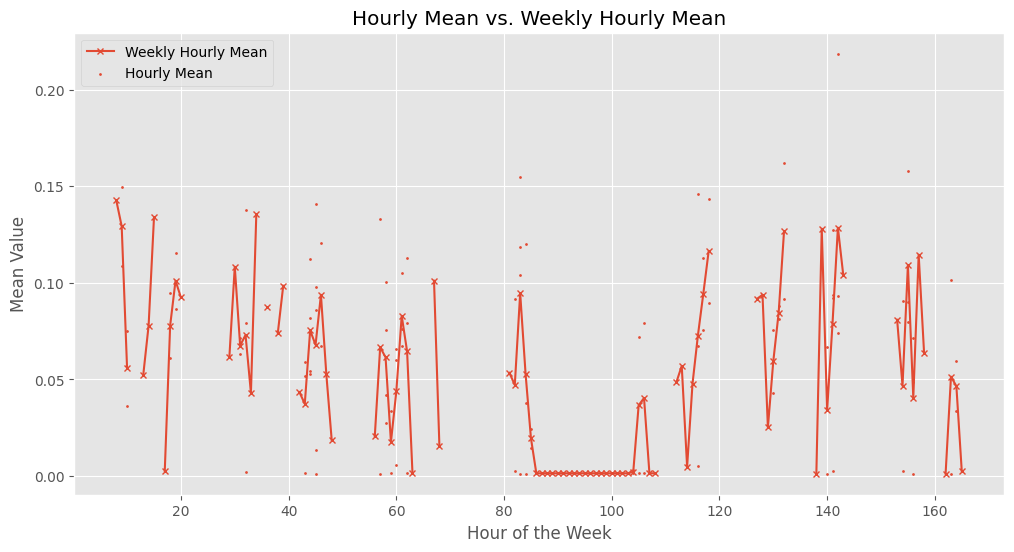

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


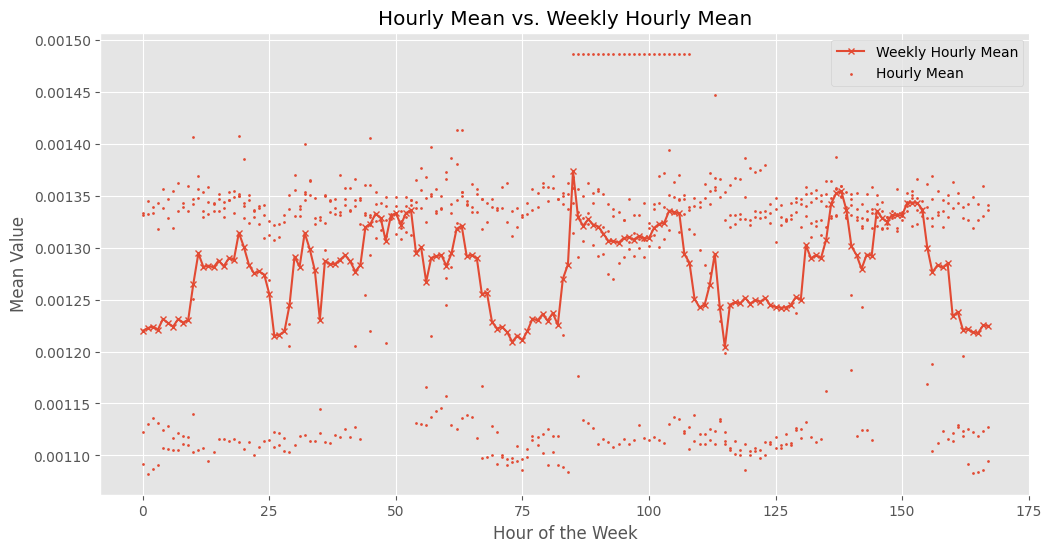

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


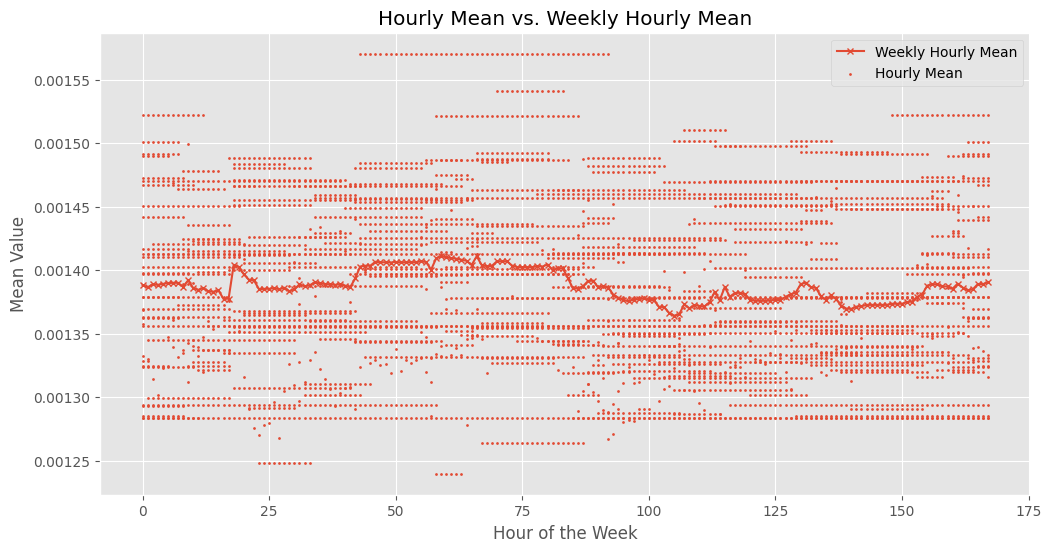

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


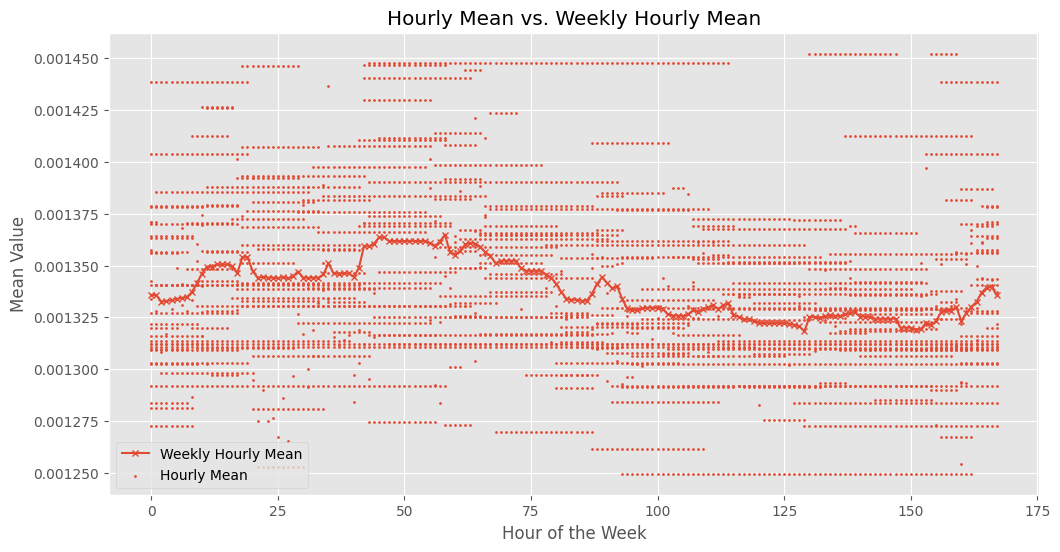

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


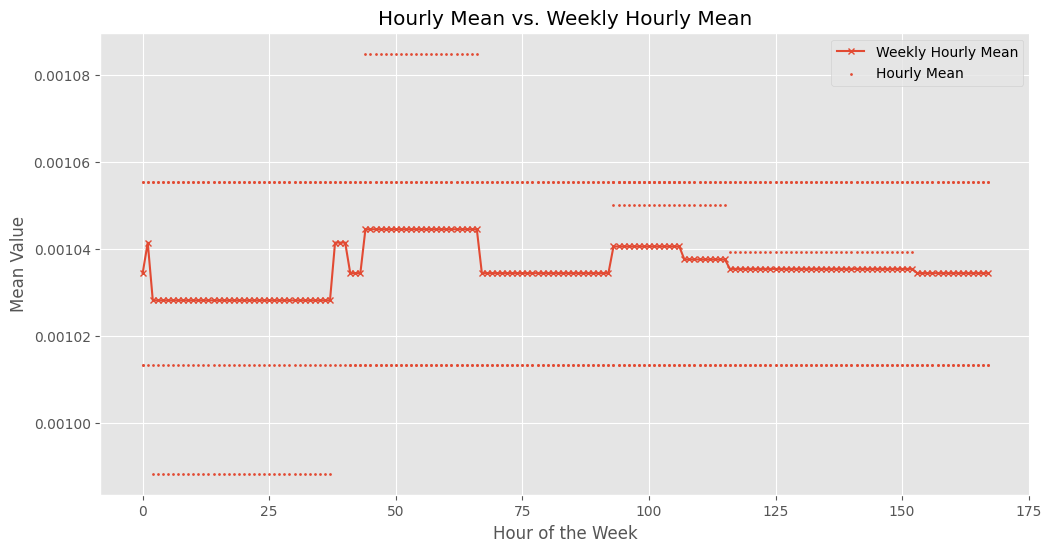

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


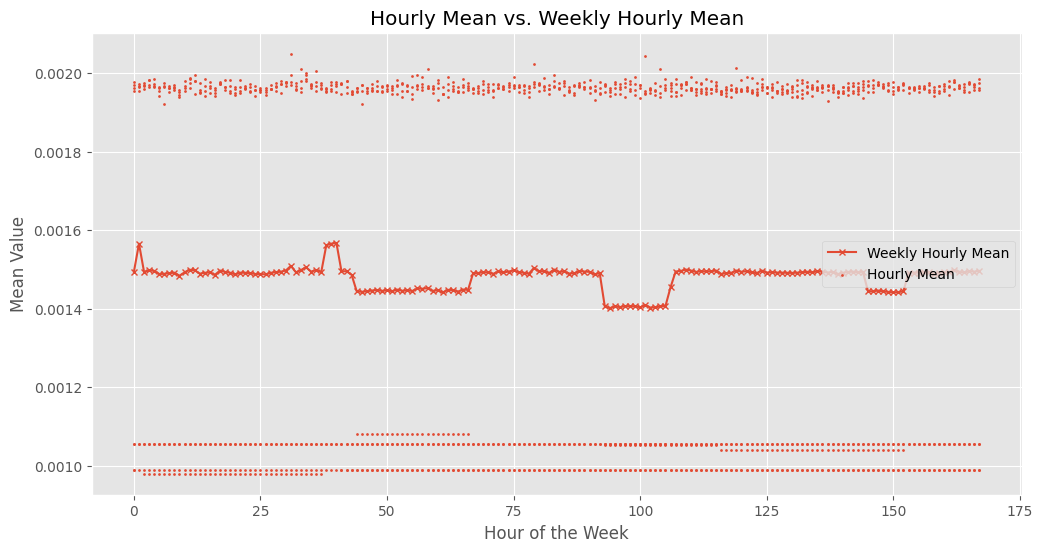

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


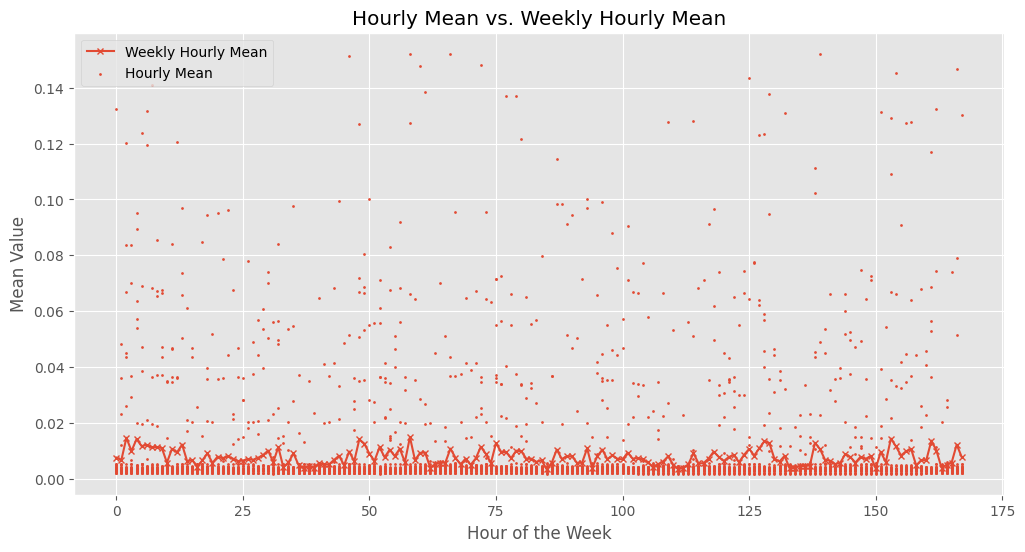

<ipython-input-47-d3ee31024b56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


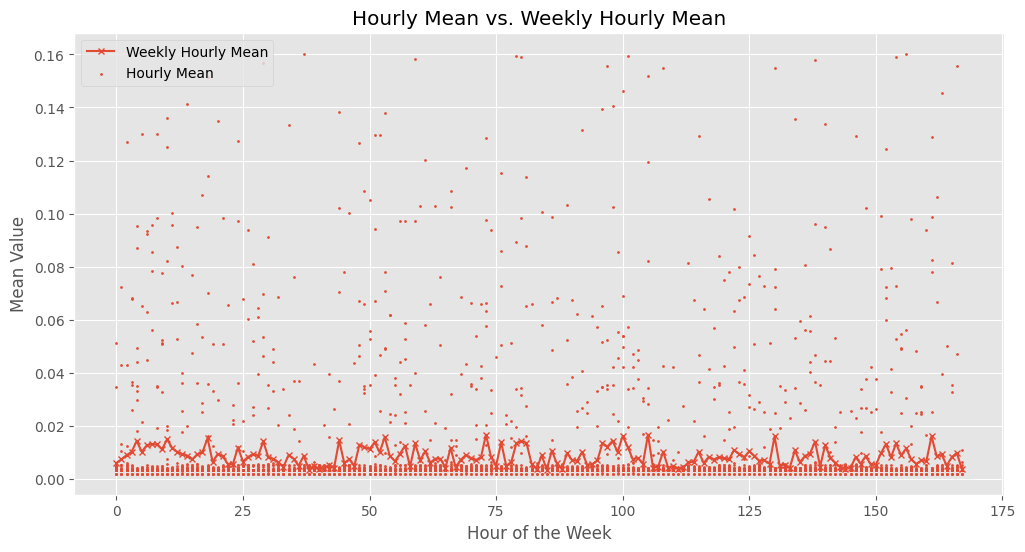

In [ ]:
v=X.columns
for i in v:
  if(i=='Time (UTC)'): continue
  feat=pd.read_csv(i + '.csv');
  feat['Time (UTC)'] = pd.to_datetime(feat['Time (UTC)'])
  func_hourofweek_2(feat)

In [ ]:
#one to five difference

def calculate_and_plot_difference(feat, difference_order):

    feature = feat.columns[1]

    #Plotting without cleaning####

    feat_cleaned = feat.dropna(subset=[feature])
    feat_cleaned = feat_cleaned[feat_cleaned[feature] != 0]



    mean = feat_cleaned[feature].mean()
    q1_val = feat_cleaned[feature].quantile(0.25)
    q3_val = feat_cleaned[feature].quantile(0.75)
    iqr_val = q3_val - q1_val

    # Calculate thresholds
    lower_threshold = q1_val - 1.5 * iqr_val
    upper_threshold = q3_val + 1.5 * iqr_val

    feat_final_cleaned = feat_cleaned[(feat_cleaned[feature] >= lower_threshold) & (feat_cleaned[feature] <= upper_threshold)]
    feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour
    feat_final_cleaned.set_index('Time (UTC)', inplace=True)

    ##Plot Again

    # Compute the differences of the feature
    diff_column_name = f'Difference Order {difference_order}'
    feat_final_cleaned[diff_column_name] = feat_final_cleaned[feature].diff(periods=difference_order)

    ##Plot Again

    # Drop the NaN values created by differencing
    feat_final_cleaned = feat_final_cleaned.dropna(subset=[diff_column_name])

    # Calculate new thresholds for the difference
    diff_mean = feat_final_cleaned[diff_column_name].mean()
    diff_q1 = feat_final_cleaned[diff_column_name].quantile(0.25)
    diff_q3 = feat_final_cleaned[diff_column_name].quantile(0.75)
    diff_iqr = diff_q3 - diff_q1

    lower_threshold_diff = diff_q1 - 1.5 * diff_iqr
    upper_threshold_diff = diff_q3 + 1.5 * diff_iqr

    # Apply new thresholds to the difference data
    feat_final_cleaned = feat_final_cleaned[(feat_final_cleaned[diff_column_name] >= lower_threshold_diff) & (feat_final_cleaned[diff_column_name] <= upper_threshold_diff)]

    hourly_mean = feat_final_cleaned.resample('H')[diff_column_name].mean().reset_index()

    # Add 'Hour of Week' column to the hourly_mean DataFrame
    hourly_mean['Hour of Week'] = hourly_mean['Time (UTC)'].dt.weekday * 24 + hourly_mean['Time (UTC)'].dt.hour

    # Calculate mean for each hour of the week over the entire duration
    weekly_hourly_mean = hourly_mean.groupby('Hour of Week')[diff_column_name].mean().reset_index()

    return hourly_mean, weekly_hourly_mean

def func_weekly_all_diffs(feat):

    for i in range(1, 6):  # First to fifth differences
        hourly_mean, weekly_hourly_mean = calculate_and_plot_difference(feat, i)
        plt.figure(figsize=(12, 8))
        # plt.scatter(hourly_mean['Hour of Week'], hourly_mean[f'Difference Order {i}'], label=f'Hourly Mean of Difference Order {i}', s=10, alpha=0.6)
        # plt.scatter(weekly_hourly_mean['Hour of Week'], weekly_hourly_mean[f'Difference Order {i}'], label=f'Weekly Hourly Mean of Difference Order {i}', s=30, alpha=0.9)
        plt.plot(weekly_hourly_mean['Hour of Week'], weekly_hourly_mean[f'Difference Order {i}'], label=f'Weekly Hourly Mean of Difference Order {i}',marker='o', linestyle='-', markersize=2 )

        plt.xlabel('Hour of the Week')
        plt.ylabel('Mean Value of Differences')
        plt.title('Hourly Mean vs. Weekly Hourly Mean of Differences')
        plt.legend()
        plt.grid(True)
        plt.show()

<ipython-input-65-2f068fe37686>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour
<ipython-input-65-2f068fe37686>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned[diff_column_name] = feat_final_cleaned[feature].diff(periods=difference_order)


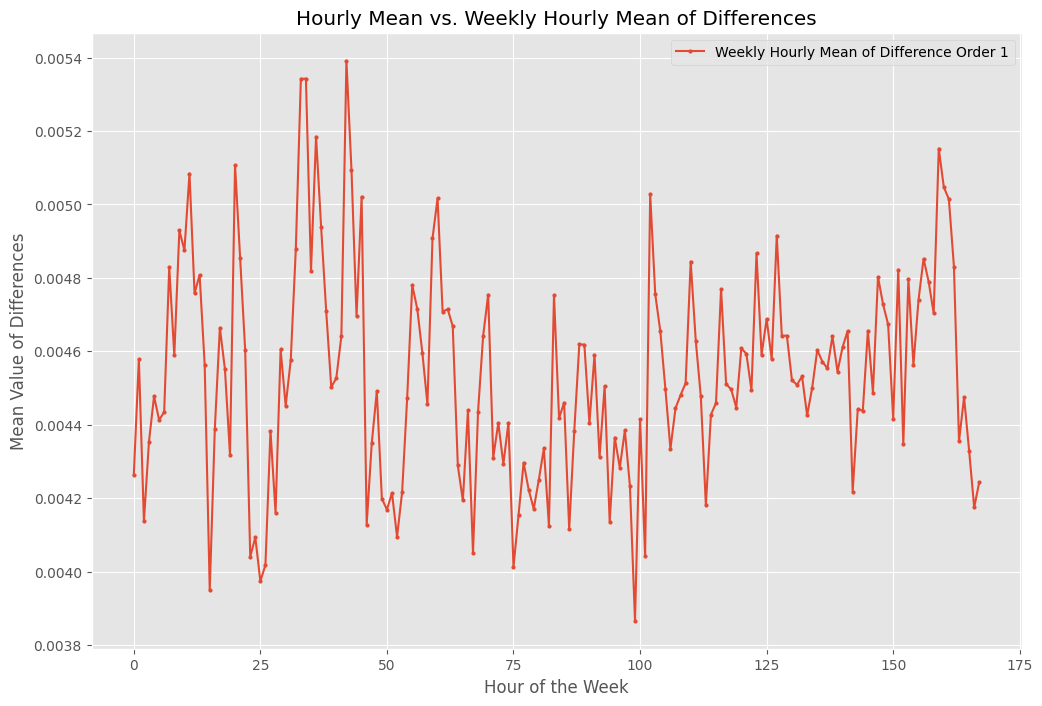

<ipython-input-65-2f068fe37686>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour
<ipython-input-65-2f068fe37686>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned[diff_column_name] = feat_final_cleaned[feature].diff(periods=difference_order)


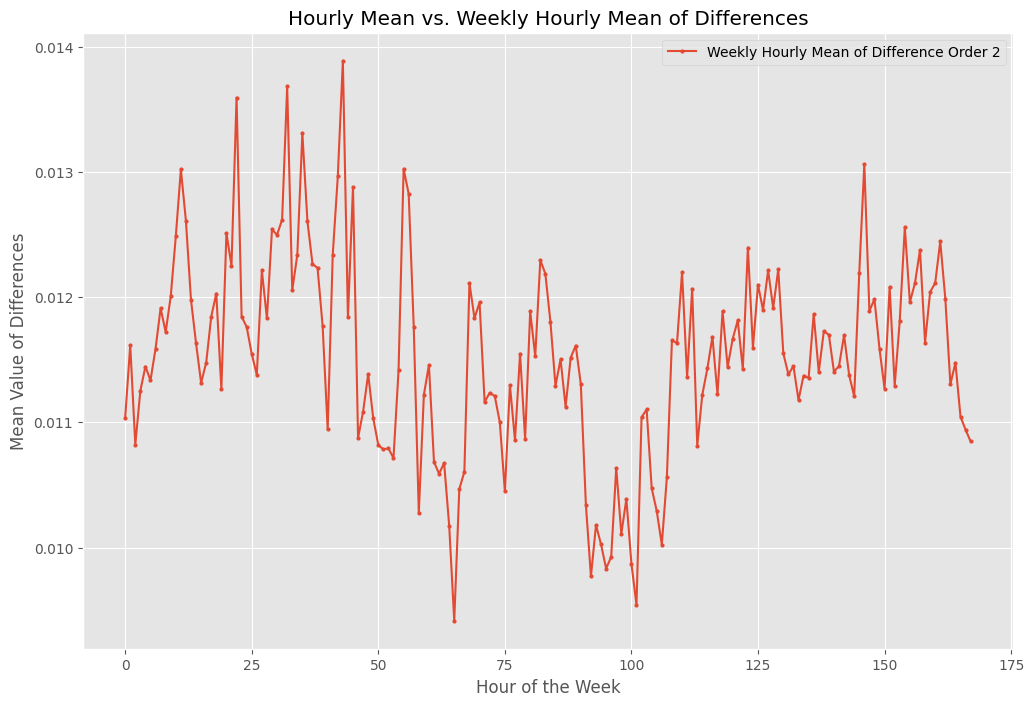

<ipython-input-65-2f068fe37686>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour
<ipython-input-65-2f068fe37686>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned[diff_column_name] = feat_final_cleaned[feature].diff(periods=difference_order)


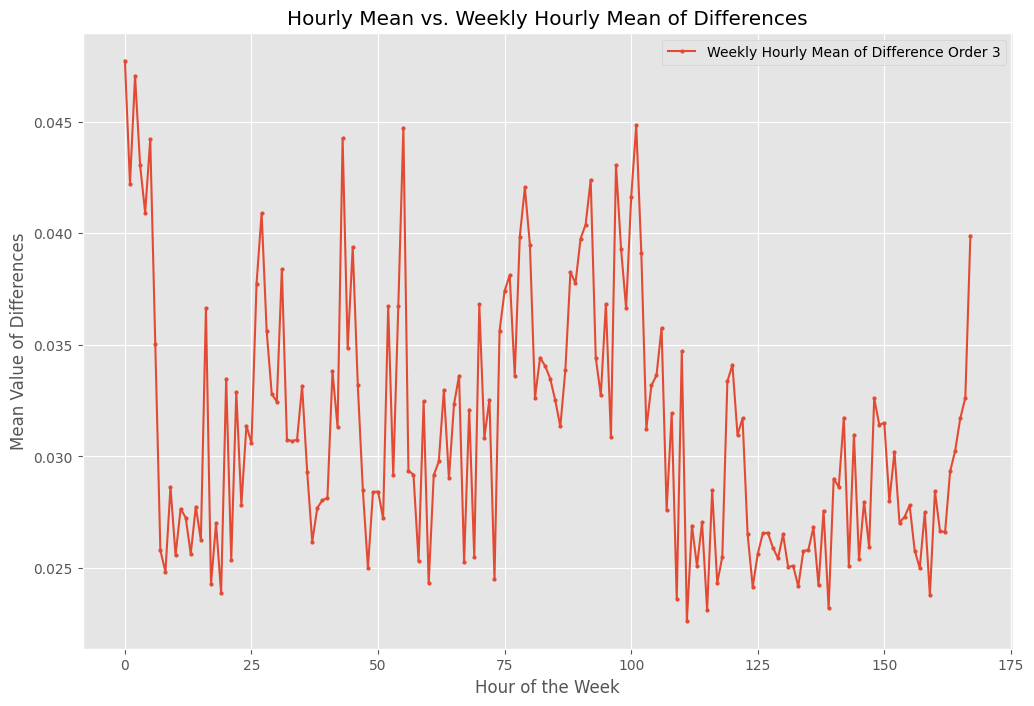

<ipython-input-65-2f068fe37686>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour
<ipython-input-65-2f068fe37686>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned[diff_column_name] = feat_final_cleaned[feature].diff(periods=difference_order)


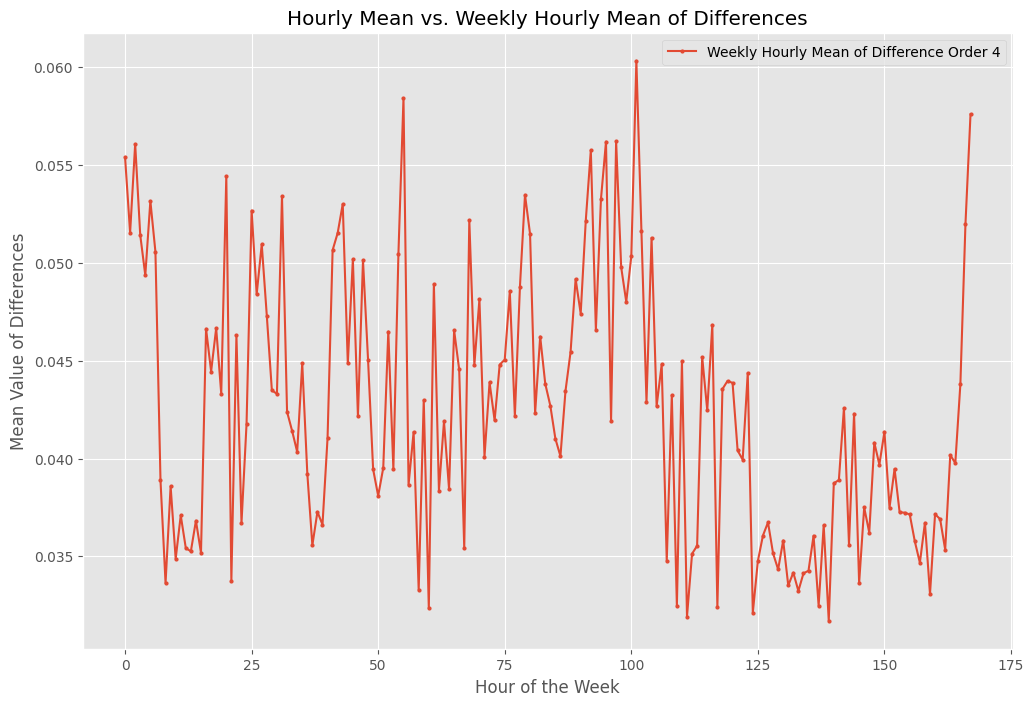

<ipython-input-65-2f068fe37686>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour
<ipython-input-65-2f068fe37686>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned[diff_column_name] = feat_final_cleaned[feature].diff(periods=difference_order)


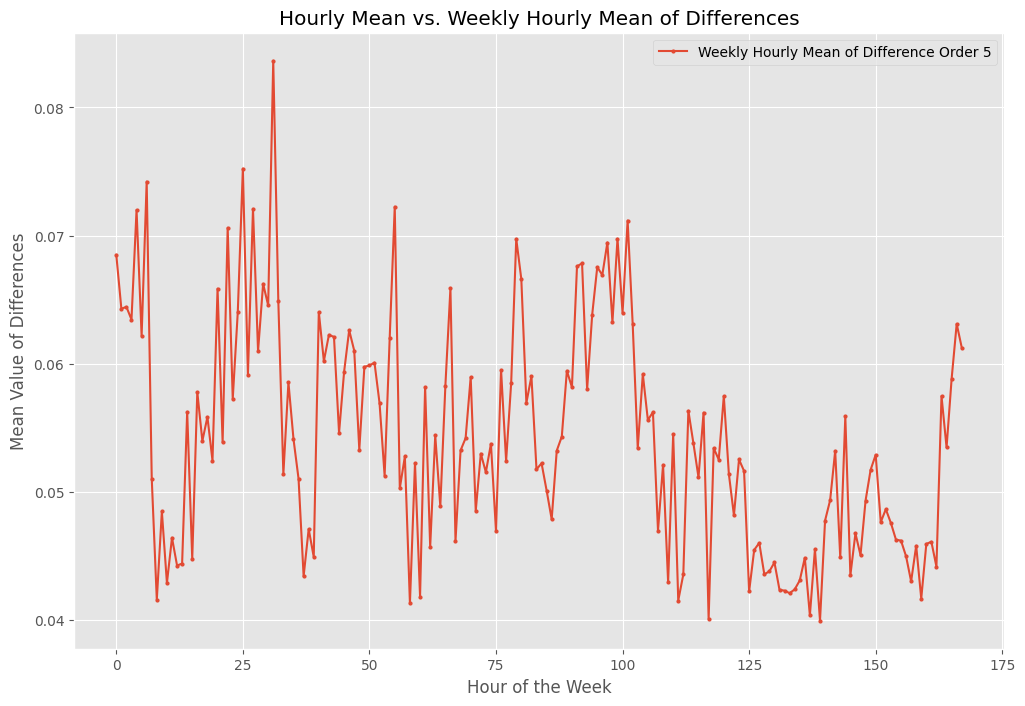

In [ ]:
feat=pd.read_csv('Energy Meter - EM_1.2.csv');
feat['Time (UTC)'] = pd.to_datetime(feat['Time (UTC)'])
func_weekly_all_diffs(feat)

TheNormalised consumption curve

In [ ]:
##Necessary Dependencies

# data and numbers
import numpy as np
import pandas as pd
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
%matplotlib inline

import pandas as pd
from sklearn import preprocessing

In [ ]:
def clean_column(column):
    # Remove zeros and NaN values
    column = column.replace(0, np.nan).dropna()

    # Calculate the IQR
    q1_val = column.quantile(0.25)
    q3_val = column.quantile(0.75)
    iqr_val = q3_val - q1_val

    # Set thresholds
    lower_threshold = q1_val - 1.5 * iqr_val
    upper_threshold = q3_val + 1.5 * iqr_val

    # Restrict values to the thresholds
    column = column.apply(lambda x: min(max(x, lower_threshold), upper_threshold))

    return column

In [ ]:
X.columns

Index(['Time (UTC)', 'API - OutsideWeatherTemp', 'API - OutsideWeatherWind',
       'API -EnergyPrice', 'Energy Meter - CALC_0', 'Energy Meter - CALC_1.9',
       'Energy Meter - CALC_2.9', 'Energy Meter - EM_1.1',
       'Energy Meter - EM_1.2', 'Energy Meter - EM_1.3',
       'Energy Meter - EM_1.4', 'Energy Meter - EM_1.5',
       'Energy Meter - EM_1.6', 'Energy Meter - EM_1.6 (includes 1.7)',
       'Energy Meter - EM_1.7', 'Energy Meter - EM_1.8',
       'Energy Meter - EM_2.1', 'Energy Meter - EM_2.2',
       'Energy Meter - EM_2.3', 'Energy Meter - EM_2.4',
       'Energy Meter - EM_2.5', 'Energy Meter - EM_2.6',
       'Energy Meter - EM_2.8', 'H0101-Temperature', 'H0102-Temperature',
       'Power - CALC_0', 'Power - CALC_1.9', 'Power - EM_1.1',
       'Power - EM_1.1-Slow', 'Power - EM_1.2', 'Power - EM_1.2-Slow',
       'Power - EM_1.3', 'Power - EM_1.3-Slow', 'Power - EM_1.4',
       'Power - EM_1.4-Slow', 'Power - EM_1.5', 'Power - EM_1.5-Slow',
       'Power - EM_1.6', '

In [ ]:
# This function normalize all meters data automatically
def normalizeData_clean(X):
    # # load data
    # df = pd.read_csv(path_raw + metername + ".csv")

    # # Transform timestamp to datetime object type
    # df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S")
    df=X[['Time (UTC)', 'Energy Meter - CALC_0', 'Energy Meter - CALC_1.9',
    'Energy Meter - CALC_2.9', 'Energy Meter - EM_1.1',
    'Energy Meter - EM_1.2', 'Energy Meter - EM_1.3',
    'Energy Meter - EM_1.4', 'Energy Meter - EM_1.5',
    'Energy Meter - EM_1.6', 'Energy Meter - EM_1.6 (includes 1.7)',
    'Energy Meter - EM_1.7', 'Energy Meter - EM_1.8',
    'Energy Meter - EM_2.1', 'Energy Meter - EM_2.2',
    'Energy Meter - EM_2.3', 'Energy Meter - EM_2.4',
    'Energy Meter - EM_2.5', 'Energy Meter - EM_2.6',
    'Energy Meter - EM_2.8']].copy()

    # Clean each column individually
    for col in df.columns[1:]:  # Skip the 'Time (UTC)' column
        df[col] = clean_column(df[col])

    # Melt meter dataset
    df = pd.melt(
        df, id_vars="Time (UTC)", var_name="Energy_meter", value_name="meter_reading",
    )
    df["Time (UTC)"] = pd.to_datetime(df["Time (UTC)"], format="%Y-%m-%d %H:%M:%S")



    # Calculate daily consumption
    # Calculate daily consumption
    df["date"] = df["Time (UTC)"].dt.date
    df = df.groupby(["date", "Energy_meter"])["meter_reading"].sum().reset_index()

    # Add area column
    # df = pd.merge(df, meta[["building_id", "sqm"]], how="left", on="building_id")
    df.head()
    # # Normalize meter reading
    # df["norm_reading"] = df["meter_reading"] / df["sqm"]
    # df = df.drop(["meter_reading", "sqm"], axis=1)

    # Unmelt
    df = df.pivot(index="date", columns="Energy_meter", values="meter_reading")

    # Scale (min-max)
    row_list = df.index # timestamp
    col_list = df.columns # building names
    x = df.values #returns a numpy array

    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x) # standard scaling

    df = pd.DataFrame(x_scaled) # as data frame
    # rename columns
    col_rename_dict = {i:j for i,j in zip(df.columns, col_list)}
    df.rename(columns=col_rename_dict, inplace=True)
    # rename rows
    row_rename_dict = {i:j for i,j in zip(df.index, row_list)}
    df.rename(index=row_rename_dict, inplace=True)

    # Sort
    df = df.T.loc[df.T.sum(axis=1).sort_values().index]

    return df


In [ ]:
# This function normalize all meters data automatically
def normalizeData(X):
    # # load data
    # df = pd.read_csv(path_raw + metername + ".csv")

    # # Transform timestamp to datetime object type
    # df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S")
    df=X[['Time (UTC)', 'Energy Meter - CALC_0', 'Energy Meter - CALC_1.9',
    'Energy Meter - CALC_2.9', 'Energy Meter - EM_1.1',
    'Energy Meter - EM_1.2', 'Energy Meter - EM_1.3',
    'Energy Meter - EM_1.4', 'Energy Meter - EM_1.5',
    'Energy Meter - EM_1.6', 'Energy Meter - EM_1.6 (includes 1.7)',
    'Energy Meter - EM_1.7', 'Energy Meter - EM_1.8',
    'Energy Meter - EM_2.1', 'Energy Meter - EM_2.2',
    'Energy Meter - EM_2.3', 'Energy Meter - EM_2.4',
    'Energy Meter - EM_2.5', 'Energy Meter - EM_2.6',
    'Energy Meter - EM_2.8']].copy()
    # Melt meter dataset
    df = pd.melt(
        df, id_vars="Time (UTC)", var_name="Energy_meter", value_name="meter_reading",
    )
    df["Time (UTC)"] = pd.to_datetime(df["Time (UTC)"], format="%Y-%m-%d %H:%M:%S")



    # Calculate daily consumption
    # Calculate daily consumption
    df["date"] = df["Time (UTC)"].dt.date
    df = df.groupby(["date", "Energy_meter"])["meter_reading"].sum().reset_index()

    # Add area column
    # df = pd.merge(df, meta[["building_id", "sqm"]], how="left", on="building_id")
    df.head()
    # # Normalize meter reading
    # df["norm_reading"] = df["meter_reading"] / df["sqm"]
    # df = df.drop(["meter_reading", "sqm"], axis=1)

    # Unmelt
    df = df.pivot(index="date", columns="Energy_meter", values="meter_reading")

    # Scale (min-max)
    row_list = df.index # timestamp
    col_list = df.columns # building names
    x = df.values #returns a numpy array

    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x) # standard scaling

    df = pd.DataFrame(x_scaled) # as data frame
    # rename columns
    col_rename_dict = {i:j for i,j in zip(df.columns, col_list)}
    df.rename(columns=col_rename_dict, inplace=True)
    # rename rows
    row_rename_dict = {i:j for i,j in zip(df.index, row_list)}
    df.rename(index=row_rename_dict, inplace=True)

    # Sort
    df = df.T.loc[df.T.sum(axis=1).sort_values().index]

    return df


In [ ]:
# This function normalize all meters data automatically
def normalizeData_clean_firstDiff(X):
    # # load data
    # df = pd.read_csv(path_raw + metername + ".csv")

    # # Transform timestamp to datetime object type
    # df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S")
    df=X[['Time (UTC)', 'Energy Meter - CALC_0', 'Energy Meter - CALC_1.9',
    'Energy Meter - CALC_2.9', 'Energy Meter - EM_1.1',
    'Energy Meter - EM_1.2', 'Energy Meter - EM_1.3',
    'Energy Meter - EM_1.4', 'Energy Meter - EM_1.5',
    'Energy Meter - EM_1.6', 'Energy Meter - EM_1.6 (includes 1.7)',
    'Energy Meter - EM_1.7', 'Energy Meter - EM_1.8',
    'Energy Meter - EM_2.1', 'Energy Meter - EM_2.2',
    'Energy Meter - EM_2.3', 'Energy Meter - EM_2.4',
    'Energy Meter - EM_2.5', 'Energy Meter - EM_2.6',
    'Energy Meter - EM_2.8']].copy()

    # Calculate the first differences for each meter column
    for col in df.columns[1:]:  # Skip the 'Time (UTC)' column
        df[col] = df[col].diff()

    # Clean each column individually
    for col in df.columns[1:]:  # Skip the 'Time (UTC)' column
        df[col] = clean_column(df[col])

    # Melt meter dataset
    df = pd.melt(
        df, id_vars="Time (UTC)", var_name="Energy_meter", value_name="meter_reading",
    )
    df["Time (UTC)"] = pd.to_datetime(df["Time (UTC)"], format="%Y-%m-%d %H:%M:%S")



    # Calculate daily consumption
    # Calculate daily consumption
    df["date"] = df["Time (UTC)"].dt.date
    df = df.groupby(["date", "Energy_meter"])["meter_reading"].sum().reset_index()

    # Add area column
    # df = pd.merge(df, meta[["building_id", "sqm"]], how="left", on="building_id")
    df.head()
    # # Normalize meter reading
    # df["norm_reading"] = df["meter_reading"] / df["sqm"]
    # df = df.drop(["meter_reading", "sqm"], axis=1)

    # Unmelt
    df = df.pivot(index="date", columns="Energy_meter", values="meter_reading")

    # Scale (min-max)
    row_list = df.index # timestamp
    col_list = df.columns # building names
    x = df.values #returns a numpy array

    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x) # standard scaling

    df = pd.DataFrame(x_scaled) # as data frame
    # rename columns
    col_rename_dict = {i:j for i,j in zip(df.columns, col_list)}
    df.rename(columns=col_rename_dict, inplace=True)
    # rename rows
    row_rename_dict = {i:j for i,j in zip(df.index, row_list)}
    df.rename(index=row_rename_dict, inplace=True)

    # Sort
    df = df.T.loc[df.T.sum(axis=1).sort_values().index]

    return df



Plotting the Thing

<ipython-input-78-f7911322c00e>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


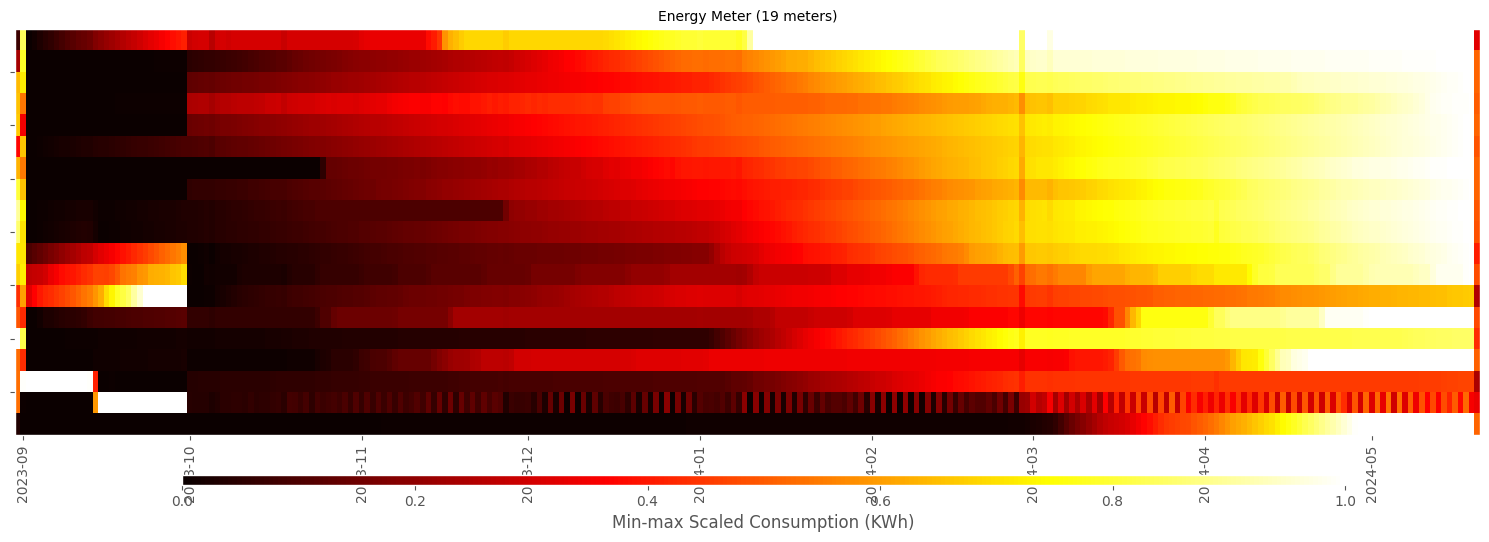

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

# Replace X with the actual DataFrame variable
df = normalizeData_clean(X)
# df = normalizeData(X)


# Get the data
dates = [dt.datetime.strptime(str(date), "%Y-%m-%d").date() for date in df.columns]
x = mdates.date2num(dates)
y = np.arange(1, len(df) + 1)

# Plot
data = np.array(df)
cmap = plt.get_cmap('hot')
qmesh = ax.pcolormesh(x, y, data, cmap=cmap, rasterized=True, vmin=0, vmax=1, shading='auto')

# Axis
ax.axis('tight')
ax.xaxis_date()  # Set up as dates
ax.tick_params("x", labelrotation=90)
ax.set_yticklabels([])
ax.set_title("Energy Meter" + " (" + str(int(max(y))) + " meters)", fontdict={'fontsize': 10})

# Color bar
cbaxes = fig.add_axes([0.125, 0.02, 0.775, 0.02])  # Adjusted to fit below the plot
cbar = fig.colorbar(qmesh, ax=ax, orientation='horizontal', cax=cbaxes)
cbar.set_label('Min-max Scaled Consumption (KWh)')

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)

plt.show()

 Violin plot

<ipython-input-19-5a5faac6f52f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


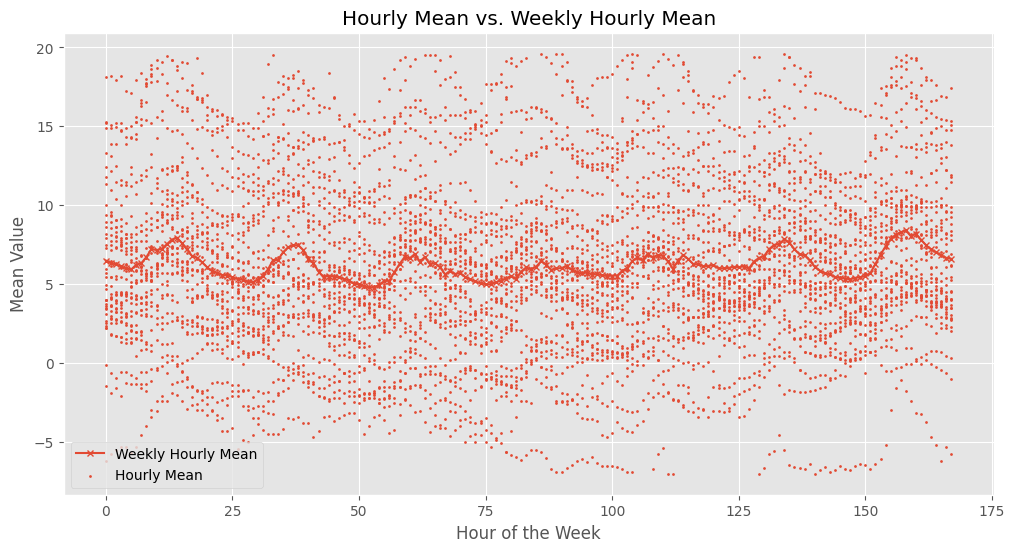

Time (UTC)                  datetime64[ns, UTC]
API - OutsideWeatherTemp                float64
dtype: object


<ipython-input-21-6806f021d730>:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='Hour of Week', x=feature, data=feat_cleaned, scale='width')


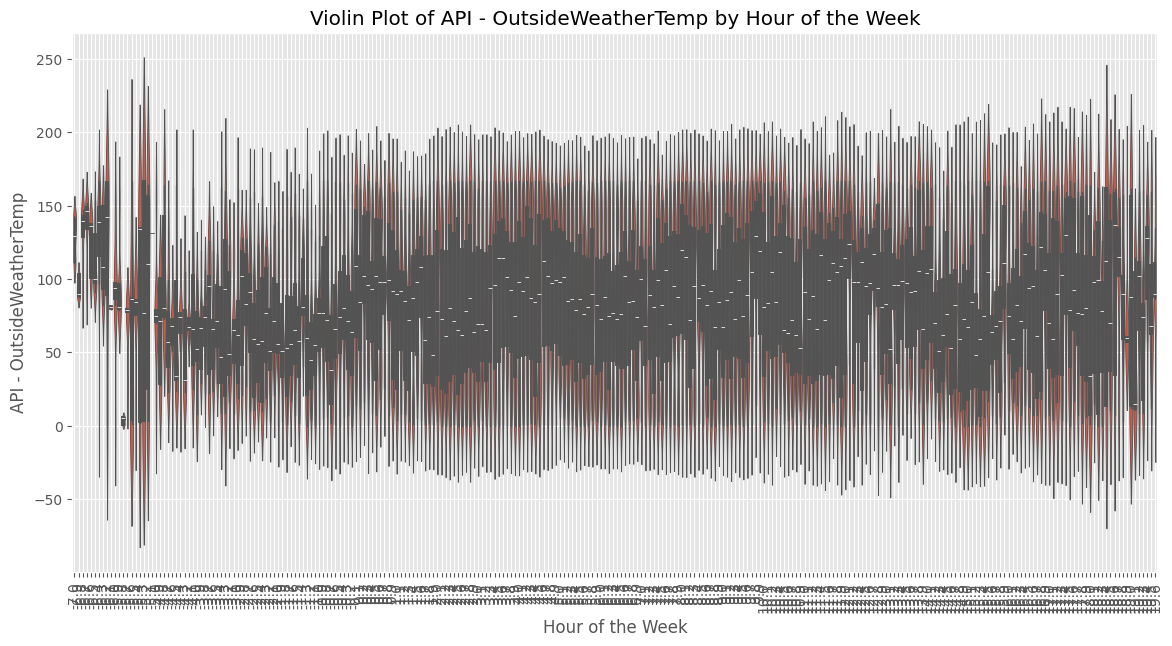

<ipython-input-19-5a5faac6f52f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


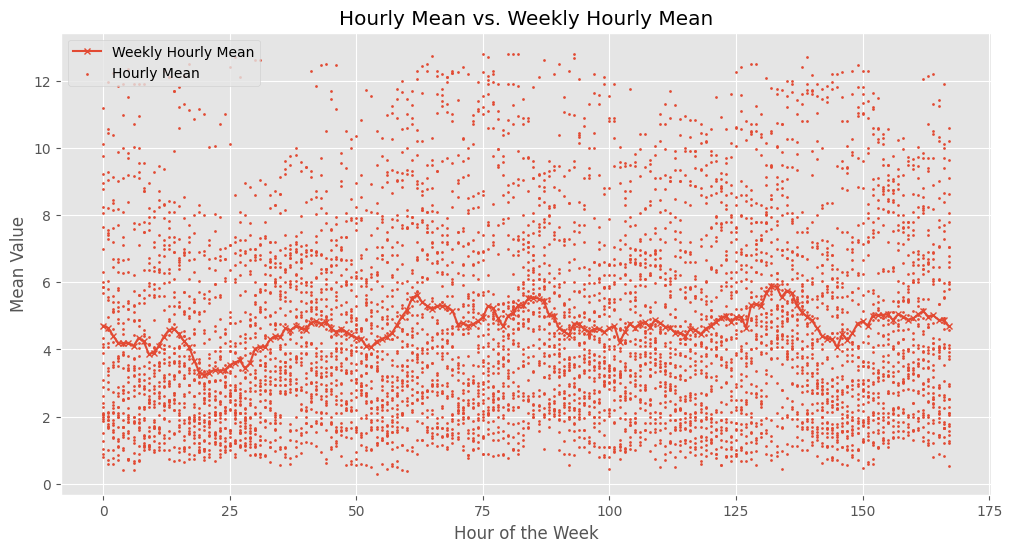

Time (UTC)                  datetime64[ns, UTC]
API - OutsideWeatherWind                float64
dtype: object


<ipython-input-21-6806f021d730>:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='Hour of Week', x=feature, data=feat_cleaned, scale='width')


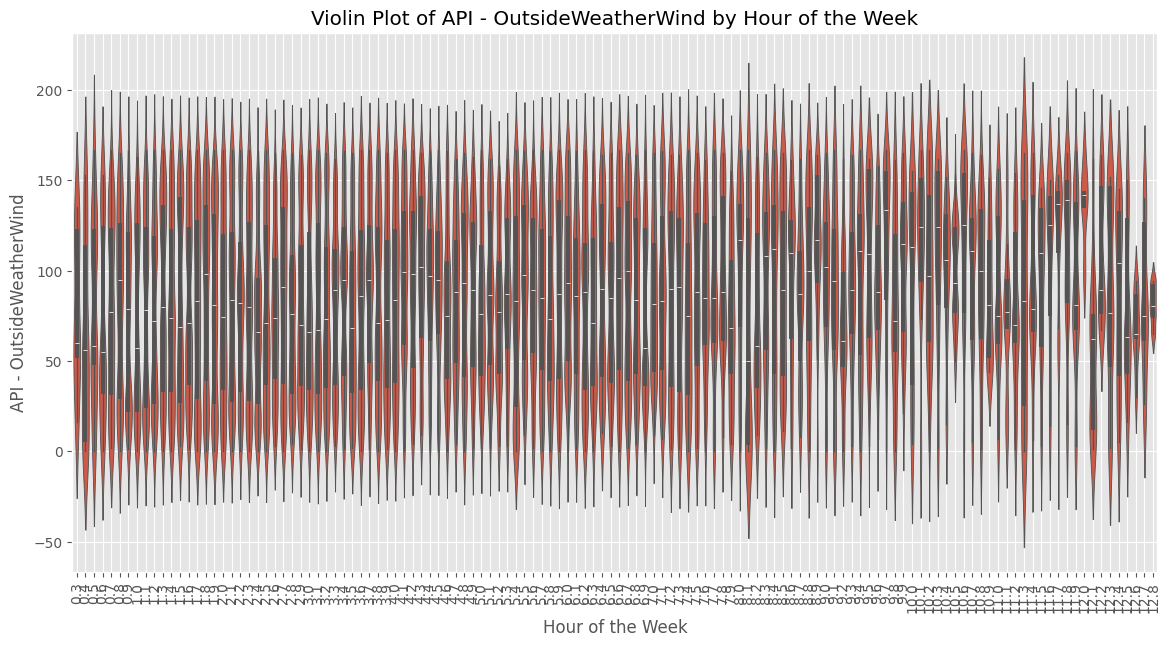

<ipython-input-19-5a5faac6f52f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_final_cleaned['Hour of Week'] = feat_final_cleaned['Time (UTC)'].dt.weekday * 24 + feat_final_cleaned['Time (UTC)'].dt.hour


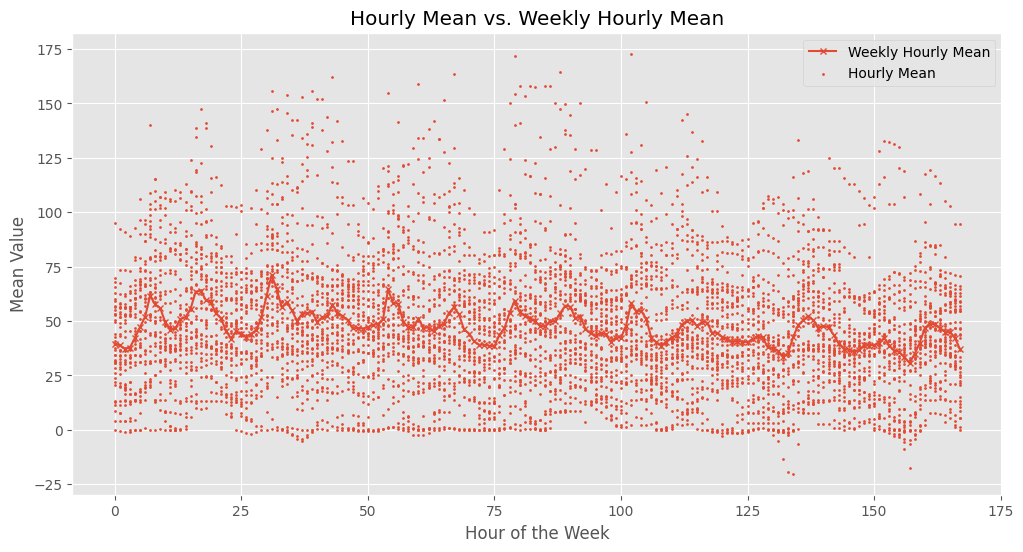

Time (UTC)          datetime64[ns, UTC]
API -EnergyPrice                float64
dtype: object


<ipython-input-21-6806f021d730>:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='Hour of Week', x=feature, data=feat_cleaned, scale='width')


KeyboardInterrupt: 

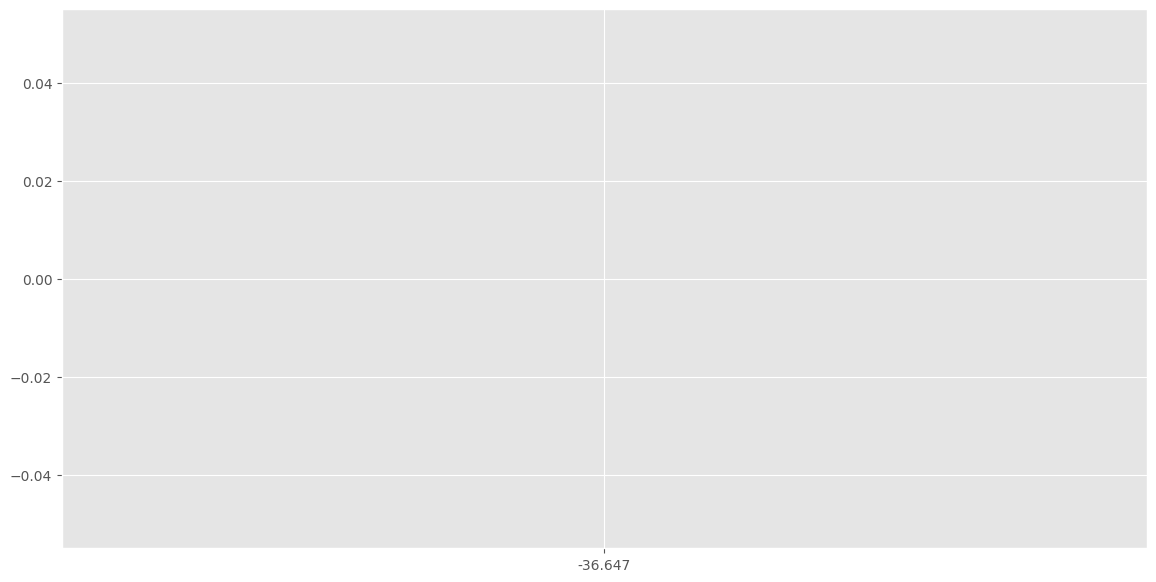

In [ ]:
v=X.columns
for i in v:
  if(i=='Time (UTC)'): continue
  feat=pd.read_csv(i + '.csv');
  feat['Time (UTC)'] = pd.to_datetime(feat['Time (UTC)'])
  feat_cleaned=func_hourofweek_2(feat)
  feature = feat.columns[1]
  print(feat.dtypes)
  plt.figure(figsize=(14, 7))
  sns.violinplot(y='Hour of Week', x=feature, data=feat_cleaned, scale='width')
  plt.xlabel('Hour of the Week')
  plt.ylabel(f'{feature}')
  plt.title(f'Violin Plot of {feature} by Hour of the Week')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()